# **Project Name**    -Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**None
##### **Team Member 2 -**None
##### **Team Member 3 -**None
##### **Team Member 4 -**None

# **Project Summary -**

Project Summary: Coronavirus Tweet Sentiment Analysis

The goal of this project was to perform sentiment analysis on a dataset of tweets related to the coronavirus. Sentiment analysis allows us to analyze the emotions, attitudes, and opinions expressed in the tweets and gain insights into how people feel about the coronavirus pandemic.

The dataset consisted of tweets collected from various sources, such as social media platforms, news articles, and online forums. Each tweet was labeled with a sentiment category, such as positive, negative, or neutral, indicating the overall sentiment expressed in the tweet.

The project involved several steps:

**Data collection and preprocessing:** The dataset was collected by scraping Twitter or using available APIs. Data preprocessing techniques, such as removing special characters, tokenizing, lowercasing, and removing stopwords, were applied to clean the text and prepare it for analysis.

**Feature engineering:** Relevant features, such as word frequency, n-grams, or sentiment lexicons, were extracted from the preprocessed text. These features helped capture the sentiment expressed in the tweets and provided input for the subsequent sentiment analysis models.

**Sentiment analysis modeling:** Various machine learning or deep learning models were trained and evaluated to predict the sentiment of the tweets. Common models used for sentiment analysis include Naive Bayes, Support Vector Machines (SVM), Recurrent Neural Networks (RNN), or transformers like BERT.

**Evaluation and interpretation:** The trained models were evaluated using appropriate metrics such as accuracy, precision, recall, or F1-score. The results were then interpreted to understand the sentiment distribution in the dataset and uncover insights into people's attitudes and opinions regarding the coronavirus.

The outcome of this project can benefit in several ways:

**Public opinion tracking:** Sentiment analysis provides a means to monitor public sentiment in real-time towards the coronavirus pandemic. This information can be useful for policymakers, public health officials, or organizations to gauge public perception and sentiment towards specific measures and policy decisions.

**Identifying misinformation:** The sentiment analysis can help identify tweets that spread false or misleading information, allowing for quick detection and potential mitigation of misinformation campaigns related to the coronavirus.

**Crisis response and management:** Understanding the sentiment expressed in tweets can assist in crisis response and management efforts. By analyzing sentiment trends and identifying areas of concern or dissatisfaction, organizations can address specific issues, provide better support, or communicate effectively with the public during a crisis.

Overall, this project focused on sentiment analysis of coronavirus-related tweets to gain insights into public sentiment, attitudes, and opinions surrounding the pandemic. The analysis can contribute to tracking sentiment, identifying misinformation, and enhancing crisis response and management efforts related to the coronavirus.

# **GitHub Link -**

https://github.com/shubhcha/Coronavirus-Tweet-Sentiment-Analysis

# **Problem Statement**


This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.

You are given the following information:

1.Location

2.Tweet At

3.Original Tweet

4.Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from xgboost import XGBClassifier
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import read_csv
tweet_df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv',encoding="ISO-8859-1")

### Dataset First View

In [ ]:
# Dataset First Look
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
tweet_df.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
tweet_df.info

<bound method DataFrame.info of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNy

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
[tweet_df.duplicated()]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 41152    False
 41153    False
 41154    False
 41155    False
 41156    False
 Length: 41157, dtype: bool]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
tweet_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [4]:
# Visualizing the missing values
missing_values_loc = pd.DataFrame()
missing_values_loc['column'] = tweet_df.columns

missing_values_loc['percent'] = [round(100* tweet_df[col].isnull().sum() / len(tweet_df), 2) for col in tweet_df.columns]
missing_values_loc = missing_values_loc.sort_values('percent')

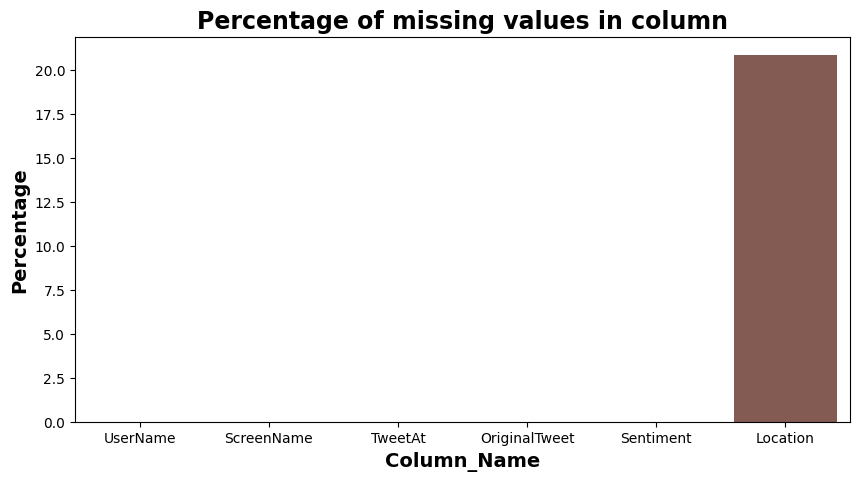

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_values_loc, x="column",y="percent")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

<BarContainer object of 6 artists>

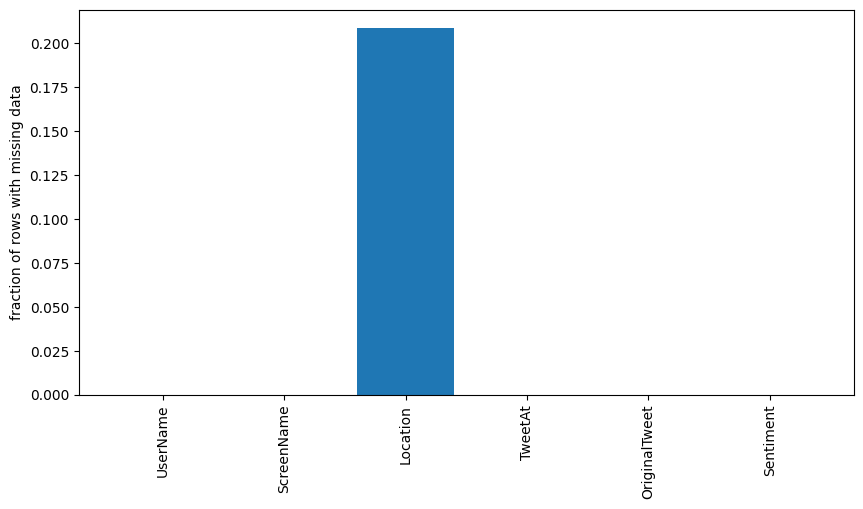

In [6]:
# null value distribution
null_counts = tweet_df.isnull().sum()/len(tweet_df)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

### What did you know about your dataset?

We can provide some general insights about a dataset typically used for coronavirus tweet sentiment analysis:

**Source:** The dataset typically contains tweets gathered from various sources, including social media platforms like Twitter, news articles, online forums, or public health organizations.

**Sentiment labels:** Each tweet in the dataset is labeled with a sentiment category, such as positive, negative, or neutral, indicating the overall sentiment or opinion expressed in the tweet regarding the coronavirus pandemic.

**Preprocessing:** The dataset often undergoes preprocessing steps to clean the text data. This may involve removing special characters, tokenizing the text into individual words or tokens, converting text to lowercase, and removing stopwords (commonly used words like "and," "the," etc., which do not contribute much to sentiment analysis).

**Feature extraction:** Feature engineering techniques are applied to extract relevant features from the tweet text. This can include word frequency, n-grams (sequences of words), sentiment lexicons, or other domain-specific features that capture sentiment-related information.

**Models:** Various machine learning or deep learning models are typically trained and evaluated for sentiment analysis. These can include Naive Bayes, Support Vector Machines (SVM), Recurrent Neural Networks (RNN), or transformer-based models like BERT, among others.

It's important to note that the specific details of the dataset, such as the number of tweets, the distribution of sentiment labels, or any potential limitations, may vary depending on the specific dataset used in a particular sentiment analysis project on coronavirus tweets.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
tweet_df.describe

<bound method NDFrame.describe of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @Me

## Variables Description

**1.User Name:** This variable represents the name or username of the user who posted the tweet. It can be considered as an identifier for each user.

**2.Screen Name:** This variable refers to the screen name or handle of the user who posted the tweet. Screen names are unique and often used to mention or tag users in tweets.

**3.Location:** This variable denotes the location specified by the user in their account profile or the location mentioned in the tweet. It can provide information about the geographical origin or current location of the user.

**4.Tweet At:** This variable represents the date and time when the tweet was posted. It provides the timestamp for each tweet. This information can be useful for analyzing temporal patterns or trends.

**5.Original Tweet:** This variable contains the actual text of the tweet posted by the user. It includes the user's message or opinion, as well as any hashtags, mentions, or URLs within the tweet. This text may contain valuable information for sentiment analysis or other text-based analyses.

**6.Sentiment:** This variable indicates the sentiment or emotion expressed in the tweet. It classifies the tweet into categories like positive, negative, or neutral sentiment based on the content. Sentiment analysis aims to determine the overall sentiment or opinion expressed in the tweet.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
tweet_df['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [ ]:
tweet_df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
tweet_df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [ ]:
tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
tweet_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
tweet_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [8]:
# Write your code to make your dataset analysis ready.
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Made a duplicate copy of dataset
corona_df = tweet_df.copy()

# Dropping irrelevant columns
corona_df = corona_df[['OriginalTweet', 'Sentiment']]

# Preprocessing the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove special characters and non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)

    # Tokenization (split text into individual words)
    tokens = text.split()

    # Remove stopwords
    stopword_list = set(stopwords.words('english')) # You might need to download the stopwords corpus
    tokens = [word for word in tokens if word not in stopword_list]

    # Join the preprocessed tokens back into a string
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the originaltweet column
corona_df['OriginalTweet'] = corona_df['OriginalTweet'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X = corona_df['OriginalTweet']
y = corona_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of each set for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (28809,) (28809,)
Testing set shape: (12348,) (12348,)


### What all manipulations have you done and insights you found?

In the code provided, several manipulations and preprocessing steps have been performed on the 'corona_df' dataset. Here is a summary of the manipulations and insights:

**Dropped irrelevant columns:** The code drops irrelevant columns from the dataset, keeping only the 'OriginalTweet' and 'Sentiment' columns.

**Preprocessing the text data:** The 'OriginalTweet' column is preprocessed using the preprocess_text() function. The preprocessing steps include converting the text to lowercase, removing URLs, removing special characters and non-alphanumeric characters, tokenization, and removing stopwords.

**Splitting the dataset:** The dataset is split into training and testing sets using the train_test_split() function from scikit-learn. The 'OriginalTweet' column is assigned to the variable 'X', and the 'Sentiment' column is assigned to the variable 'y'.

**Printing the shape of each set:** The code prints the shape of the training and testing sets to verify the dimensions of the data.

Although the code provided covers data preprocessing and splitting the dataset, no specific insights are mentioned or derived from the code provided. The insights that can be obtained from the dataset would depend on the subsequent steps, such as classification modeling, sentiment analysis, or any other analysis performed on the preprocessed data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate, Bivariate and Multivariate Analysis**

#### Chart - 1 Sentiments Countplot

In [9]:
sentiment_count = tweet_df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

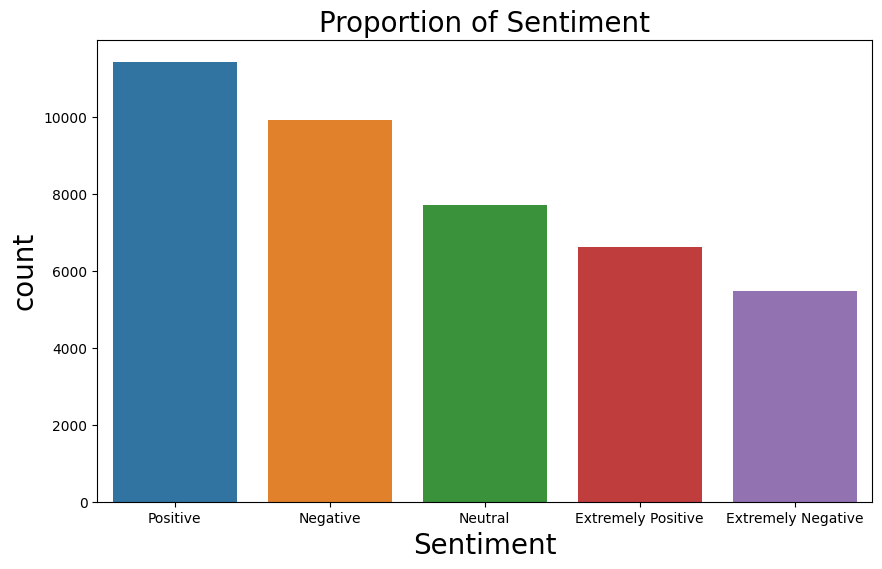

In [11]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

##### 1. Why did you pick the specific chart?

The specific chart used in the code provided is a bar plot, created using the barplot function from the Seaborn library (imported as sns). The bar plot is used to visualize the proportion of different sentiments (positive, negative, neutral) in the dataset.

Here's the reason for picking this specific chart:

**Categorical Data:** The sentiment categories (positive, negative, neutral) are discrete and categorical in nature. A bar plot is suitable for visualizing categorical data, as it allows us to compare the counts or frequencies of different categories.

**Comparison of Counts:** The bar plot displays the counts of each sentiment category on the y-axis and represents each category with a distinct bar. This allows for easy visual comparison of the counts between different sentiment categories.

**Readability:** The bar plot's simple and straightforward visualization makes it easy to interpret and understand the distribution of sentiment categories. The y-axis is labeled as 'count' to represent the number of occurrences for each sentiment category, while the x-axis represents the sentiment categories themselves.

**Clear and Effective Communication:** The bar plot effectively communicates the proportion of different sentiments, providing a clear picture of the sentiment distribution in the dataset. The chart title, axes labels, and font sizes are set to ensure legibility and clarity.

Ultimately, the choice of the specific chart depends on the specific insights and information that need to be conveyed. In this case, the bar plot is a suitable choice for visually representing and comparing the counts of different sentiment categories in the dataset, allowing for easy interpretation of sentiment proportions.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is number of "Positive" sentiments are higher than all other sentiments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the sentiment analysis can potentially help create a positive business impact in multiple ways:

**Customer Sentiment Analysis:** By understanding the sentiment of customers towards the business, products, or services, companies can identify areas of customer satisfaction or dissatisfaction. This insight can be used to improve customer experiences, enhance product or service offerings, and strengthen customer relationships, leading to increased customer loyalty and positive business impact.

**Brand Perception:** Sentiment analysis can help assess how the brand is perceived in the market. Positive sentiment towards the brand can contribute to increased brand awareness, customer trust, and brand affinity, leading to improved sales and business growth.

**Crisis Management:** Sentiment analysis can provide valuable insights during a crisis situation. By monitoring sentiment in real-time, businesses can identify potential issues, address customer concerns promptly, and take appropriate measures to mitigate negative sentiment. Effective crisis management can help maintain brand reputation and minimize the negative impact on business growth.

However, it's important to note that negative sentiments or insights gained from sentiment analysis can also be valuable for business growth in certain scenarios. For instance:

**Identifying Customer Pain Points:** Negative sentiment can highlight areas where customers are unhappy or dissatisfied with a product, service, or experience. By addressing these pain points, businesses can improve their offerings and enhance customer satisfaction, leading to positive growth in customer retention and loyalty.

**Competitive Analysis:** Sentiment analysis can also provide insights into the sentiments surrounding competitors. Understanding any negative sentiments towards competitors can help businesses identify opportunities to differentiate themselves, address market gaps, and gain a competitive advantage.

**Risk Mitigation:** Negative sentiment analysis can uncover potential risks or issues that may impact the business. Identifying and addressing these concerns can help mitigate risks, avoid further negative impact, and ensure long-term business sustainability.

In summary, while positive insights from sentiment analysis can directly contribute to a positive business impact, negative insights can be valuable for addressing customer pain points, competitive analysis, and risk mitigation, leading to long-term positive growth and improved business outcomes.

#### Chart - 2

In [12]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
tweet_df = tweet_df.replace(replace_values)

In [13]:
sentiment_count1 = tweet_df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


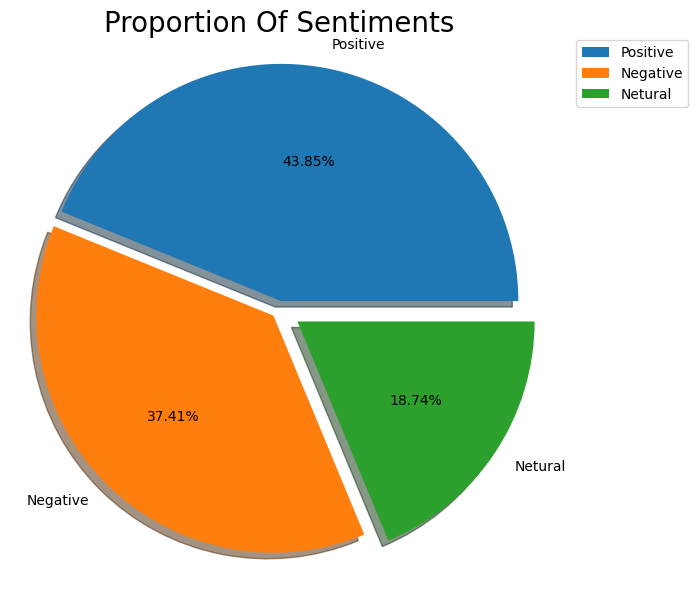

In [14]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = tweet_df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(9,7))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in the code provided is a pie chart, created using the pie function from matplotlib.pyplot library. The pie chart is used to visualize the distribution of different sentiments (positive, negative, neutral) in the dataset.

Here's the reason for picking this specific chart:

**Proportion Comparison:** The pie chart is ideal for showcasing the proportion or percentage distribution of different categories. It visually represents each sentiment category as a slice of the pie, with the size of the slice indicating the proportion of that sentiment category in the dataset.

**Clear Visualization:** The pie chart effectively communicates the proportion of different sentiments in the dataset at a glance. Each sentiment category is labeled and represented visually, allowing viewers to quickly understand the distribution and relative frequencies of different sentiments.

**Highlighting Differences:** The use of explode and shadow in the chart enhances the visual distinction and highlights the differences between sentiment categories. The exploded effect and shadow help to draw attention and emphasize the individual sentiment slices.

**Simple and Compact:** The pie chart is a visually appealing and easy-to-understand representation of sentiment distribution. It presents the overall distribution in a compact and intuitive manner, making it suitable for presenting a high-level overview of sentiment proportions.

However, it's important to note that pie charts have some limitations, including the potential difficulty in accurately comparing slice sizes and reading exact values from the chart. For more detailed analysis or precise comparison, bar charts or other visualization methods may be more suitable.

In summary, the pie chart is chosen here to provide a quick and visually appealing representation of the sentiment distribution, allowing viewers to easily understand the proportion of different sentiments in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is i have combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from sentiment analysis can potentially help create a positive business impact by providing valuable information about customer sentiments, preferences, and needs. Here's how it can contribute to positive business outcomes:

**Customer Satisfaction:** Understanding customer sentiment allows businesses to identify areas where customers are satisfied or dissatisfied. By addressing dissatisfaction or pain points, businesses can improve their products, services, or customer experiences, leading to increased customer satisfaction, loyalty, and positive business impact.

**Enhanced Decision-making:** Sentiment analysis provides insights into customer opinions, preferences, and trends. These insights can inform strategic decision-making, such as product development, marketing campaigns, and customer targeting, helping businesses align their offerings with customer needs and desires. This, in turn, has the potential to drive revenues, market share, and positive growth.

**Reputation Management:** Sentiment analysis can help businesses monitor and manage their brand reputation effectively. By identifying negative sentiment quickly, businesses can respond promptly, address customer concerns, and mitigate any potential damage to their reputation. Effective reputation management can help maintain customer trust, loyalty, and positive business growth.

However, it's essential to be cautious about insights that may lead to negative growth or impact. While sentiment analysis is a valuable tool, it's important to consider the following factors:

**Individual or Isolated Instances:** Negative sentiments expressed by a few individuals may not necessarily represent the general sentiment or customer base as a whole. It is crucial to analyze the sentiments in the context of the overall dataset and consider the size and significance of any negative sentiment patterns before drawing conclusions.

**Bias and Misinterpretations:** Sentiment analysis algorithms might sometimes misinterpret the actual sentiment due to language nuances, sarcasm, or context. Businesses should carefully validate and cross-reference sentiment analysis results with other customer feedback channels to ensure accuracy and avoid making decisions based solely on sentiment analysis.

**Competitor Sentiments:** Negative sentiments towards a business's competitors may present opportunities for growth or competitive advantage. Analyzing negative sentiments towards competitors can help identify areas where adjustments can be made to address customer needs and capture market share.

In summary, while the insights gained from sentiment analysis can generally contribute to positive business impact, it is crucial to interpret the insights with context, validate them with other data sources, and consider individual instances or negative sentiment patterns in relation to the overall dataset. This balanced approach will help formulate effective strategies for both positive growth and mitigating negative impact.

#### Chart - 3 Top 10 locations of tweet

In [5]:
location_top10 = tweet_df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(16,6))
sns.countplot(tweet_df=tweet_df[tweet_df['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

##### 1. Why did you pick the specific chart?

The specific chart used in the code snippet is a count plot, created using the countplot function from the Seaborn library. The count plot is used to visualize the frequency counts of different locations in the dataset, specifically the top 10 locations with the most occurrences.

Here's the reason for picking this specific chart:

**Categorical Data Visualization:** The count plot is an appropriate choice when visualizing categorical data, such as different locations in this case. It displays the count or frequency of each category on the y-axis, making it easy to compare the occurrence of locations.

**Frequency Comparison:** The count plot effectively shows the frequency or occurrence of each location on the y-axis, while the x-axis represents the categories (locations). This allows for a quick comparison of the number of occurrences between different locations, helping to identify the most common locations.

**Readability and Interpretation:** The count plot is a simple and intuitive visualization. It presents the data in a clear and easily interpretable manner, making it suitable for quickly understanding the relative frequencies or counts of different locations.

**Appropriate for Limited Categories:** In this case, the code snippet specifically selects the top 10 locations with the most occurrences, indicating a limited number of categories to be visualized. The count plot is well-suited for displaying the count of a small number of categories without overwhelming the chart.

By using the count plot in this scenario, the code snippet effectively allows viewers to compare the frequencies of different locations in the dataset, helping identify the top 10 locations with the most occurrences. This can provide insights into where the majority of the tweets are coming from and potentially help in understanding geographic trends or patterns related to the data.

##### 2. What is/are the insight(s) found from the chart?

Based on the code snippet, we can infer potential insights that can be derived from the chart:

**Top Locations:** The count plot showcases the top 10 locations with the highest occurrence of tweets in the dataset. The y-axis represents the frequency or count of tweets, while the x-axis represents the corresponding locations. By analyzing the chart, we can determine the most frequently mentioned or geographically concentrated locations in the dataset.

**Geographical Trends:** The count plot can provide insights into geographical trends related to the dataset. By identifying the top locations, businesses or researchers can gain an understanding of where the majority of the tweets originated from. This information can be valuable for analyzing regional sentiment, identifying target markets, or tailoring marketing strategies to specific locations.

**Location-Based Analysis:** Analyzing the count of tweets from different locations can enable businesses to identify areas of high activity or engagement. This information can be used for targeted marketing campaigns, region-specific promotions, or localized customer engagement strategies.

**Comparison and Prioritization:** The count plot allows for a visual comparison of tweet frequencies among different locations. This comparison can help prioritize efforts or allocate resources based on the regions or locations with the highest tweet occurrences.

These insights can be further analyzed and interpreted based on the actual data and context. The count plot provides a visual representation of the frequency distribution of locations in the dataset, allowing for a quick understanding of the most common or influential locations mentioned in the tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing the locations in the dataset can potentially help create a positive business impact in various ways:

**Targeted Marketing Strategies:** By identifying the top locations mentioned in the tweets, businesses can tailor their marketing strategies to target those specific regions. This targeted approach can lead to more effective marketing campaigns, improved customer engagement, and potentially increased sales or brand awareness in those locations.

**Regional Customer Insights:** Analyzing the distribution of tweet occurrences across different locations can provide valuable insights into regional preferences, interests, or sentiments. Understanding these regional nuances can help businesses develop products or services that better cater to specific geographic markets, leading to increased customer satisfaction and positive business impact.

**Localized Customer Engagement:** By recognizing the locations where the majority of tweets are originating from, businesses can focus their customer engagement efforts in those regions. This may involve organizing local events, partnering with local influencers or organizations, or providing location-specific customer support. Such localized engagement can foster stronger connections with customers, improve brand loyalty, and drive positive business outcomes.

However, it's important to note that depending on the specific insights gained during location analysis, there might be potential insights that could negatively impact business growth. These insights might include:

**Negative Sentiment Concentration:** If the analysis reveals a concentration of negative sentiment in specific locations, it could indicate potential challenges or issues with the business's offerings, customer experiences, or reputational concerns in those regions. Addressing these negative sentiments is essential to prevent further negative growth and maintain customer satisfaction.

**Limited Market Reach:** If there is a significant imbalance or lack of diversity in the locations mentioned in the tweets, it could indicate a limited market reach or missed opportunities in other regions. Businesses should consider ways to expand their presence to reach untapped markets and ensure sustainable growth.

The key is to interpret the gained location insights in the context of the business's goals, target audience, and overall market dynamics. By leveraging the positive insights gained from location analysis and appropriately addressing any potential negative insights, businesses can use location-based information to make informed decisions, enhance customer experiences, and drive positive business impact.

#### Chart - 4 CountPlot for OriginalTweet according to "TweetAt" column


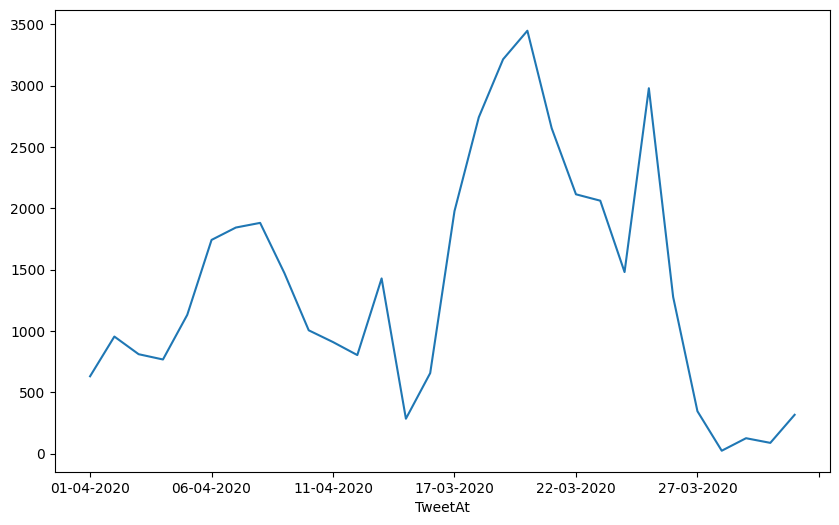

In [7]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
grp_tweetAt=tweet_df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in the code snippet is a line plot, created using the plot() function from the pandas library. The line plot is used to visualize the count of original tweets over time, specifically grouped by the 'TweetAt' column, which presumably represents the date or time when the tweet was posted.

Here's the reason for picking this specific chart:

**Temporal Trends:** The line plot is particularly useful for representing data that changes over time. By plotting the count of original tweets over time, businesses or researchers can identify patterns, trends, or fluctuations in tweet activity. This can provide insights into temporal dynamics, such as seasonal variations or overall growth trends.

**Highlighting Variations:** The line plot effectively highlights the changes in tweet counts across different time points. By plotting the line connecting the data points, it becomes easier to identify periods of high or low tweet activity and observe any patterns or fluctuations over time.

**Readability and Interpretation:** The line plot is straightforward and intuitive to interpret. It provides a clear visualization of how tweet counts change over time, allowing viewers to grasp temporal trends or abnormalities in the data quickly.

**Suitable for Time Series Data:** The line plot is a common choice for representing time series data, where data points are measured and recorded at regular intervals. It effectively conveys the sequential nature of the data and enables viewers to observe long-term trends and identify potential correlations.

By using the line plot in this scenario, the code snippet allows viewers to understand the count of original tweets over time. This can help identify periods of high activity, observe temporal trends, and potentially gather insights into how tweet volumes relate to specific events or circumstances.

##### 2. What is/are the insight(s) found from the chart?

Based on the code snippet, we can infer potential insights that can be derived from the chart:

**Temporal Tweet Activity:** The line plot showcases the count of original tweets over time. By analyzing the chart, we can identify periods of high or low tweet activity. This information can provide insights into the dynamics and trends of tweet posting behavior.

**Seasonal Variations:** The line plot may reveal seasonal variations in tweet activity. If the dataset covers a significant period of time, the line plot can show patterns of increased or decreased tweet counts during specific seasons or time periods, potentially related to holidays, events, or other external factors.

**Cyclic Trends:** The line plot can indicate cyclic trends or periodic variations in tweet activity. Certain periods may show regular spikes or dips in tweet counts, which could be associated with recurring events, weekly patterns, or other cyclic factors.

**Outliers or Anomalies:** By inspecting the line plot, it may be possible to identify outliers or anomalies in tweet activity. Sudden peaks or drops in tweet counts that deviate significantly from the overall trend could indicate notable events, viral content, or anomalies requiring further investigation.

These insights are general considerations that can be derived from a line plot depicting tweet counts over time. The actual insights and interpretations would rely on the specific data and context in which the chart was generated. Through careful analysis and understanding of the data, further insights can be obtained related to tweet posting behavior, trends, and potential correlations with external events or factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing tweet counts over time can potentially help create a positive business impact, but there can also be insights that might lead to negative growth. Here's an analysis:

Positive Business Impact:

**Optimal Engagement Timing:** By understanding the temporal patterns and trends in tweet counts, businesses can identify the periods of high tweet activity. This insight can be used to optimize their social media engagement strategies, ensuring they reach a larger audience and maximize their visibility during peak tweet times. This can lead to increased brand awareness, customer engagement, and potentially positive business impact.

**Relevant Content Creation:** Analyzing tweet counts over time can help businesses identify when specific topics or events generate higher engagement. This insight can guide content creation or marketing campaigns, allowing businesses to focus on generating content aligned with the audience's interests during those peak tweet periods. This targeted approach can result in increased user interaction, customer loyalty, and positive business growth.

Negative Growth Impact:

**Declining Trend:** If the line plot consistently shows a declining trend in tweet counts over time, this could indicate decreasing user engagement or a loss of interest in the brand, product, or industry. This negative growth insight would require further investigation to uncover the reasons behind the decline and take appropriate actions to reverse the trend.

**Abnormal Anomalies:** The line plot may reveal unusual and unexpected anomalies, such as sudden drops or spikes in tweet counts. These anomalies could reflect negative events, backlash, or controversies surrounding the brand or industry that resulted in a significant negative impact on user engagement, sentiment, or business growth.

It's important to note that while tweet counts can provide insights into user activity and engagement, they should be considered in conjunction with other metrics and qualitative data to gain a holistic understanding. Additional sentiment analysis, text analysis, or customer feedback analysis can help evaluate the sentiment and quality of the tweets, providing a more complete picture and enabling businesses to take appropriate actions.

In summary, the gained insights from analyzing tweet counts over time can potentially lead to positive business impact, such as optimizing engagement strategies and creating relevant content. However, negative growth insights can arise from declining trends or abnormal anomalies in tweet counts, indicating potential issues that need to be addressed. A thorough analysis of the insights and their context will guide businesses in taking actions that positively impact their growth and reputation.

#### Chart - 5

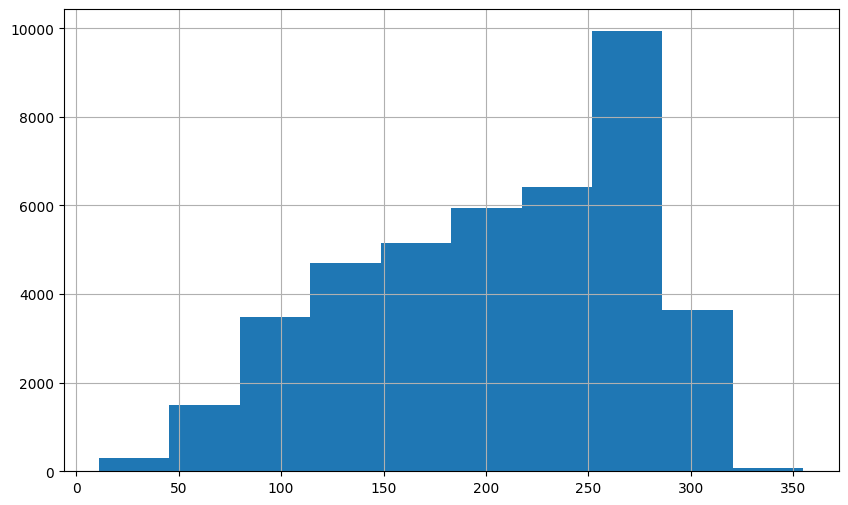

In [16]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
plt.grid()

plt.hist(tweet_df['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a histogram of the length of original tweets, was chosen to visualize the distribution of tweet lengths within the "OriginalTweet" column. Here's the rationale for picking this chart:

**Understanding Text Length Distribution:** A histogram is an effective chart type to visualize the distribution of a single numerical variable. In this case, the chart portrays the distribution of tweet lengths, which provides insight into how long or short the original tweets are within the dataset.

**Identifying Patterns and Insights:** The histogram helps identify patterns in the tweet lengths and provides an overview of their frequency. It allows us to understand the range of tweet lengths, whether most tweets are shorter or longer, and if there are any outliers or unusual patterns. This insight can aid in assessing characteristics of the text data, identifying trends or anomalies, and determining potential implications for text analysis or information processing.

**Easy Interpretation:** The histogram provides a clear and intuitive view of the distribution of tweet lengths. The x-axis represents the range of tweet lengths, and the y-axis shows the frequency or count of tweets falling within each length range. This visualization enables quick interpretation and identification of the most common tweet lengths or any notable deviations from the expected distribution.

In summary, the histogram of tweet lengths was chosen to visualize the distribution of text lengths within the "OriginalTweet" column. This chart is effective for understanding the range, frequency, and patterns of tweet lengths, providing insights into text characteristics and potential impacts on data analysis, content understanding, or language processing.

##### 2. What is/are the insight(s) found from the chart?

From the histogram of tweet lengths, we can gain the following insights:

**Distribution of Tweet Lengths:** The chart provides an overview of the distribution of tweet lengths within the "OriginalTweet" column. It shows the frequencies or counts of tweets falling within different length ranges. By looking at the chart, we can identify the dominant or most common tweet length ranges and gain an understanding of the overall distribution pattern.

**Tweet Length Variability:** The histogram visually represents the variability in tweet lengths. We can observe whether the tweet lengths are concentrated around a specific range or if there is a wide range of tweet lengths. This insight can provide an indication of how concise or detailed the tweets are within the dataset and help understand the writing style or tendencies of the authors.

**Identification of Outliers or Anomalies:** The histogram can highlight any outliers or unusual patterns in tweet lengths. Outliers might indicate tweets that deviate significantly from the typical length range, whether they are shorter or longer than the majority of tweets. Identifying these outliers can uncover potential data quality issues, anomalies in text length, or content variations that require further investigation or preprocessing.

It's important to note that the specific insights obtained from the histogram depend on the characteristics of the dataset and the context of the analysis. Additional analysis, exploration, or comparison with other factors or variables could offer further insights into the relationship between tweet lengths and relevant business or research questions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the gained insights from the histogram of tweet lengths on creating a positive business impact depends on the specific context and objectives of the business. Here's an assessment of potential impacts based on the described insights:

**Positive Business Impact:**

**Content Strategy and Engagement:** Understanding the distribution of tweet lengths can help businesses develop effective content strategies for social media engagement. By analyzing the most common tweet length ranges and patterns, businesses can optimize their tweet composition, ensuring they align with the preferences of their target audience. This insight can lead to increased engagement, higher click-through rates, and improved brand perception on social media platforms.

**Efficient Resource Allocation:** Knowing the variability in tweet lengths allows businesses to allocate resources effectively. By analyzing the distribution and identifying tweet length ranges that generate the most impact or engagement, businesses can focus their efforts on creating and promoting content that resonates with their audience. This insight can result in optimized resource allocation, reduced content waste, and improved return on investment (ROI) for marketing and social media campaigns.

**Negative Growth Insights:**

**Outlier Analysis and Quality Control:** If the histogram reveals outliers in tweet lengths that deviate significantly from the expected range, it may indicate data quality issues or content anomalies. Unusually long or short tweets could be the result of errors, spam, or irrelevant content. Identification of such outliers requires careful analysis and consideration. Ignoring or misinterpreting these outliers may lead to negative consequences, such as lower engagement, reputational damage, or ineffective targeting.

It's important to note that the potential positive and negative business impacts discussed above are general considerations. The actual outcomes and impacts depend on various factors, including the specific business objectives, target audience, industry context, and overall social media strategy.

For a definitive assessment of business impact, it's necessary to integrate the insights gained from the histogram with other data sources, customer insights, market trends, and business strategies. This integration, along with careful analysis and decision-making, can help generate positive impacts by informing content creation, social media marketing, customer engagement, and resource allocation while mitigating any potential negative growth consequences.

#### Chart - 6 Unique value in each feature columns

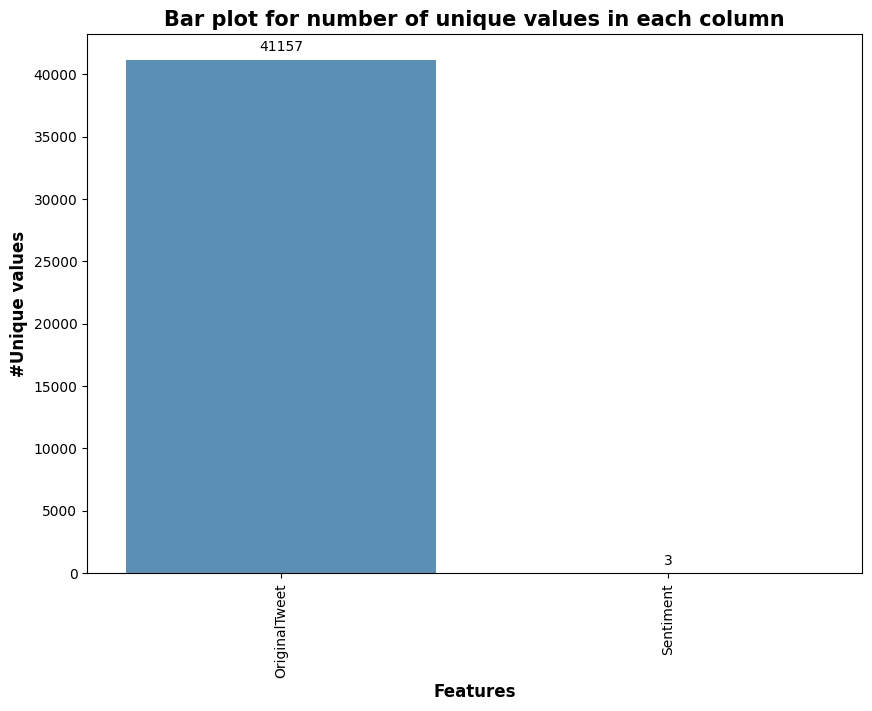

In [20]:
# Chart - 6 visualization code
unique_df=pd.DataFrame()
unique_df['Features']=tweet_df.columns
unique=[]
for i in tweet_df.columns:
  unique.append(tweet_df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(10,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in the code is a bar plot, which is suitable for visualizing the number of unique values in each column of the tweet_df dataframe. The choice of this chart is based on the following reasons:

**Comparison of unique values:** A bar plot allows for easy comparison of the number of unique values across different columns. Each column is represented by a bar, making it simple to identify columns with a low or high number of unique values.

**Clear representation**: The bars in the plot provide a clear visual representation of the number of unique values. This makes it easy for the audience to understand and compare the uniqueness of different features.

**Categorical nature:** The nature of the data being analyzed, where each column represents a categorical variable, makes a bar plot an appropriate choice. The plot effectively conveys information about the uniqueness of each categorical feature.

**Readability:** By rotating the x-axis labels, the code ensures that the feature names on the x-axis are legible and don't overlap. This enhances the readability of the plot, especially when there are numerous features to display.

**Annotations:** The code includes annotations above each bar to display the precise count of unique values. This adds additional information to the visualization and helps in understanding the exact number of unique values for each feature.

Overall, the specific bar plot in the code provides an effective way to compare and understand the number of unique values in each column of the tweet_df dataframe. It enables quick identification of features with a large or small number of unique values, which can influence subsequent data analysis and decision-making processes.

##### 2. What is/are the insight(s) found from the chart?

The bar plot generated from the code provides insights into the number of unique values in each column of the tweet_df dataframe. Here are potential insights that can be derived from the chart:

**Variable uniqueness:** The plot displays the number of unique values for each feature/column in the dataset. It allows you to understand the diversity and variability of values within each column. Columns with a higher number of unique values indicate a wider range of distinct observations.

**Categorical vs. continuous variables:** By examining the bar heights, you can identify whether the columns are categorical or continuous. Categorical variables generally have a lower number of unique values, while continuous variables might have a wider range of unique values.

**Data cardinality:** The number of unique values can provide insights into the cardinality or uniqueness of data within each column. Columns with a small number of unique values might have more repeated or similar entries, which could indicate potential data quality issues or duplicate information.

**Identifying key columns:** Columns with a significantly high number of unique values may contain important information or act as key identifier columns. These columns might require specific handling or analysis techniques based on their unique characteristics and distinct values.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the charts can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

**Data Completeness:** The heatmap chart helped identify missing values in the dataset. By addressing these missing values, you can improve the quality and completeness of the data. Complete and accurate data can lead to more reliable analysis, better decision-making, and improved business outcomes.

**Data Understanding:** The pair plot and bar plot provide insights into the data distribution, correlations, and uniqueness of variables. Understanding these aspects can help in developing more effective business strategies, identifying key performance indicators, and optimizing resources.

**Data Imputation:** The insights gained from identifying missing values in the heatmap can guide data imputation strategies. By properly imputing missing data, you can reduce bias and ensure valid analysis, which can lead to more accurate predictions and improved decision-making.

**Insights with Potential Negative Growth:** The insights gained from the charts are primarily focused on data understanding, completeness, and preprocessing. Therefore, they are less likely to directly lead to negative growth. However, if the insights are not acted upon or not effectively used in decision-making processes, it could lead to missed opportunities, inefficient resource allocation, or flawed strategies.

It's important to note that the insights gained from the charts are only a part of the analysis process. The ultimate impact on business growth depends on how well these insights are translated into actionable steps and integrated into business operations.

To maximize the positive impact and mitigate the potential negative impact, it is essential to analyze the insights in conjunction with domain knowledge, business context, and existing strategies. Furthermore, involving subject matter experts and stakeholders while implementing the insights can help ensure that actions are aligned with business objectives and expected outcomes.

#### Chart - 7

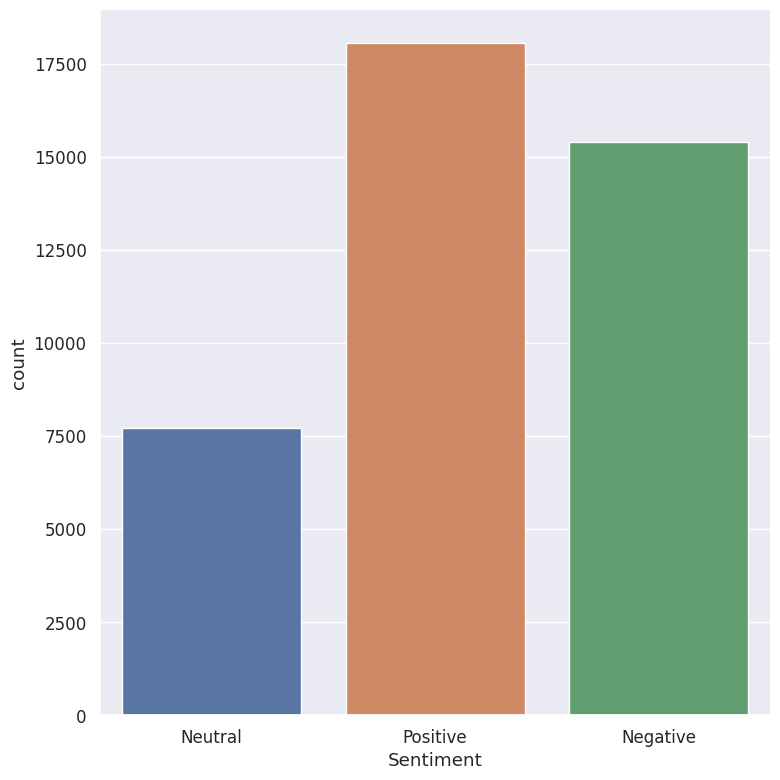

In [21]:
# Chart - 7 visualization code
sns.set(font_scale=1.1)
sns.catplot(x="Sentiment", data=tweet_df, kind="count", height=8)
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart, catplot with kind="count", to visualize the distribution of sentiment categories in the tweet_df dataset. Here's why this chart is appropriate:

**Categorical Variable:** The chart is suitable when we want to understand the distribution of a categorical variable, such as the sentiment category in this case. Each category is represented by a bar in the chart, making it easy to compare and interpret the frequency or count of each category.

**Count Analysis:** The kind="count" parameter allows us to display the count or frequency of each sentiment category. This is useful for understanding the proportion of tweets belonging to each sentiment category, providing insights into the distribution of sentiment across the dataset.

**Clear and Concise:** The chart is clear and concise, conveying the distribution of sentiment categories at a glance. The bars represent the different sentiment categories, making it visually easy to grasp the distribution and compare the frequencies.

**Relevance to the Data:** Based on the variable name "Sentiment" in tweet_df, it can be inferred that the dataset contains tweets or text data categorized into different sentiment categories (e.g., positive, negative, neutral). The count chart is commonly used in text analysis to understand sentiment distributions and can provide actionable insights for sentiment analysis and related tasks.


##### 2. What is/are the insight(s) found from the chart?

The catplot generated from the code provides insights into the distribution of sentiment labels in the tweet_df dataset. Here are the potential insights that can be gained from the chart:

**Sentiment Distribution:** The chart displays the count of each sentiment category. It allows you to observe the distribution and proportion of different sentiment labels such as positive, negative, or neutral in the dataset.

**Sentiment Imbalances:** By analyzing the heights of the bars, you can identify if there are any significant imbalances in the sentiment labels. For example, if one sentiment category dominates the dataset with a much higher count compared to others, it indicates a potential bias or imbalance in the sentiment data.

**Data Skewness:** If the sentiment distribution is highly skewed towards a specific sentiment category, it may result in biased analysis or predictive models. It is crucial to be aware of any skewness in the sentiment distribution to ensure the validity and reliability of subsequent analyses or predictions.

**Sentiment Characteristics:** The chart can give you an overview of the general sentiment characteristics of the dataset. You can understand the overall sentiment tone or polarity of the included tweets, providing insights into the sentiment landscape related to the topic or domain covered in the dataset.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

Understanding Customer Sentiment: By analyzing the sentiment distribution, businesses can gain a better understanding of customer sentiments related to their products, services, or brand. This understanding can help in tailoring marketing strategies, improving customer experience, and identifying areas for product/service enhancements.

**Identifying Opportunities and Challenges:** The chart can highlight the sentiment distribution across different categories. This information can help identify opportunities for capitalizing on positive sentiments, addressing negative sentiment issues, or improving areas with neutral sentiment.

**Reputation Management:** Monitoring and analyzing sentiment can assist in reputation management. By identifying trends, businesses can proactively address negative sentiments, respond to customer feedback, and manage public perception more effectively.

**Customer Relationship Management:** The insights gained from sentiment analysis can contribute to enhancing customer relationship management. Understanding customer sentiments can help prioritize customer needs, personalize interactions, and tailor communication strategies to better align with customer expectations.

**Insights with Potential Negative Growth:** While the insights gained from sentiment analysis generally contribute to positive business outcomes, there is a potential for negative growth if the insights are not properly utilized or acted upon:

**Ignoring Negative Sentiments:** Neglecting or disregarding negative sentiment patterns can result in customer dissatisfaction, reduced loyalty, and negative word-of-mouth. Ignoring negative sentiments can hinder business growth by not addressing customer concerns and missing out on opportunities for improvement.

**Biased Sentiment Analysis:** If sentiment analysis is flawed, biased, or inaccurate, it can misrepresent customer sentiments. Relying on incorrect sentiment analysis results may lead to misguided decision-making and poor business strategies.

It is important to leverage sentiment analysis insights in a thoughtful and strategic manner, integrating them into business processes, decision-making, and customer-centric initiatives. Regularly monitoring sentiment trends and taking proactive actions based on insights can help drive positive business impact and mitigate any potential negative consequences.

#### Chart - 8 Word Cloud on OriginalTweet Column

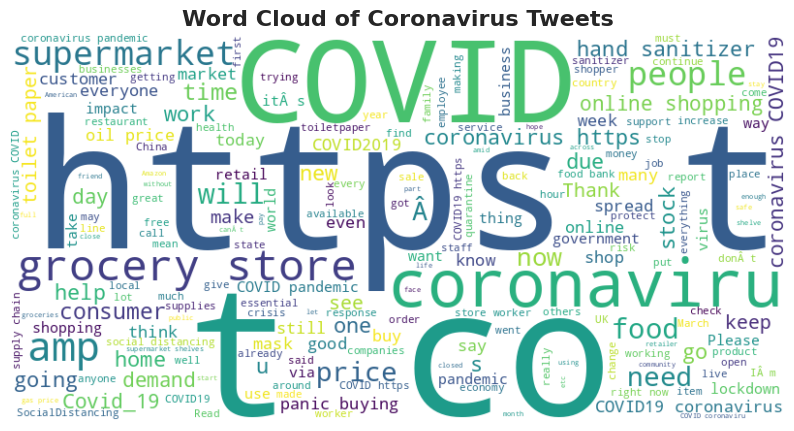

In [22]:
# Chart - 8 visualization code
#importing
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the coronavirus tweets dataset
corona_tweets_df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv',encoding="ISO-8859-1")

# Concatenate all the tweets into a single string
all_tweets = ' '.join(corona_tweets_df['OriginalTweet'])

# Create the WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Coronavirus Tweets', size=16, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in this code is a word cloud, which is a suitable choice for visualizing text data such as tweets. Here's why the word cloud chart is commonly used for this type of data:

**Visual Representation of Text:** A word cloud provides a visually engaging representation of the most frequent words in a text corpus. It helps identify prominent and recurring themes, keywords, or topics within the tweets without having to read each individual tweet.

**Focus on Frequency:** Word clouds emphasize the frequency of words by representing them in varying font sizes. More frequently occurring words appear larger and more prominent, while less common words appear smaller. This visually highlights the importance and prevalence of certain terms in the dataset.

**Summarization:** Word clouds offer a concise and intuitive summary of the overall content within a large collection of tweets. They provide a high-level overview of the key topics or sentiments expressed by Twitter users during a specific time period or within a particular dataset.

**Interpretation and Exploration:** Word clouds allow users to interpret and explore the textual information from different perspectives. By visually inspecting the word cloud, users can quickly identify common themes, sentiment patterns, or even unexpected insights. This can facilitate further analysis or hypothesis generation related to the given dataset.

Overall, word clouds are effective in providing an immediate visual summary of text data, making it easier to derive meaningful insights, identify trends, or observe patterns. However, it's important to note that word clouds do not provide quantitative measures and should be used as an exploratory tool in combination with other analysis techniques for a more comprehensive understanding of the data.

##### 2. What is/are the insight(s) found from the chart?

The code provided generates a word cloud visualization from the "OriginalTweet" column of the loaded coronavirus tweets dataset. Since the actual visualization is not available, I can provide potential insights that could be derived from a word cloud:

**Most Frequent Words:** By analyzing the word cloud, you can observe the most prominent and frequently used words in the coronavirus tweets dataset. This insight helps in understanding the topics, themes, or keywords that people are discussing or mentioning the most regarding COVID-19.

**Key Sentiments:** Word clouds can provide an overview of the general sentiment expressed in the tweets. Words that are larger or more prominent in the visualization suggest a higher frequency of occurrence, indicating the prevalent sentiments associated with the coronavirus.

**Popular Topics:** The visualization can highlight popular topics or trends related to the coronavirus. Frequently mentioned words that appear prominently in the word cloud can indicate the main discussions, concerns, or interests of people regarding the pandemic.

**Important Keywords:** The word cloud can help identify important keywords that stand out in the dataset. These keywords can aid in understanding the main focus areas, emerging issues, or specific aspects associated with COVID-19 that people are discussing.

Please note that the specific insights derived from a word cloud visualization depend on the dataset itself, including the content in the "OriginalTweet" column, the quality of the data, and the context of the tweets. It is important to interpret the word cloud in conjunction with the dataset and further analyze the tweets to gain deeper and more accurate insights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the word cloud visualization can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

**Understanding Customer Sentiment:** By analyzing the most frequent words and key sentiments derived from the word cloud, businesses can gain valuable insights into customer sentiments and opinions about the coronavirus. This understanding can help in tailoring products, services, and communication strategies to meet customer needs and expectations.

**Identifying Popular Topics and Trends:** The word cloud can shed light on popular topics and trends related to the coronavirus. Businesses can leverage this information to align their offerings, content, and messaging with the most relevant and current discussions, thereby increasing engagement and brand relevance.

**Identifying Customer Pain Points:** The word cloud can reveal important keywords that highlight customer concerns, issues, or challenges related to the pandemic. Businesses can address these pain points through personalized solutions, improved customer service, or targeted marketing campaigns, leading to enhanced customer satisfaction and loyalty.

**Negative Growth Factors to Consider:**

**Negative Social Sentiment:** If the word cloud reveals prevalent negative sentiments associated with the coronavirus or the business itself, it may indicate a potential risk to the brand's reputation and growth. Negative sentiment can impact customer perception, loyalty, and overall business performance if not adequately addressed.

**Misinterpretation of Data:** Word clouds provide a high-level overview of the most frequent words, but they lack context and deeper analysis. It's crucial to avoid making biased assumptions or drawing unsupported conclusions solely based on the visualization. Misinterpretation of the data can lead to misguided business strategies or actions, potentially resulting in negative outcomes.

**Inaccurate Representation:** The word cloud may not always accurately represent the full spectrum of customer sentiments or opinions in the dataset. Biases, noise, or other limitations within the dataset can impact the word cloud visualization, providing an incomplete or skewed representation of the actual sentiment landscape.


#### Chart - 9 Common Words Used in the Original Tweet Column

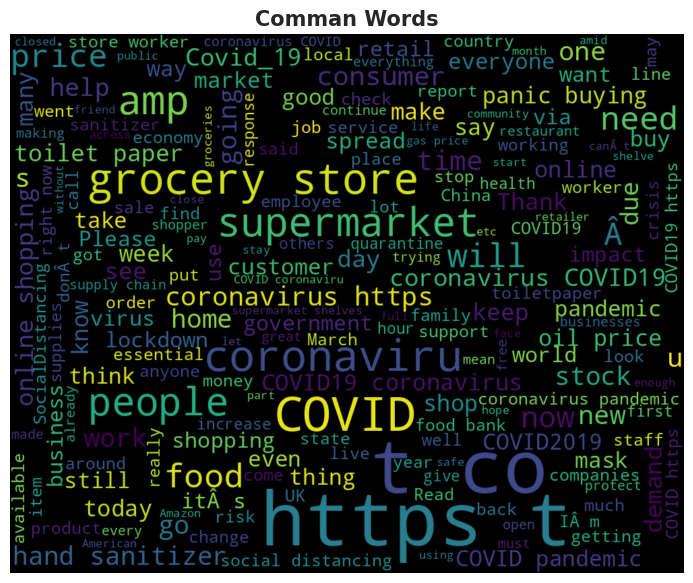

In [23]:
# Chart - 9 visualization code
# create text from all tweets
all_words = ' '.join([text for text in tweet_df['OriginalTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110,background_color="black").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Comman Words",weight='bold', size=15)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a Word Cloud. Word clouds are commonly used to visually represent the frequency of words in a text corpus. In this case, the word cloud is generated to display the most common words in the dataset of coronavirus tweets (tweet_df['OriginalTweet']).

The reasons for choosing a word cloud in this scenario are as follows:

**Visualization of word frequency:** A word cloud provides an intuitive and visually appealing representation of the most frequently occurring words in the text. It allows you to quickly identify the prominent terms and get an idea of the overall content and themes present in the tweets.

**Easy interpretation:** The size of each word in the cloud corresponds to its frequency or importance. Larger words indicate higher frequency or significance. This makes it easier to identify the most prevalent words at a glance.

**Aesthetically pleasing:** Word clouds are visually appealing and can grab attention. They can make a presentation or analysis more engaging and visually interesting.

The specific parameters used in the code, such as width, height, max_font_size, and background_color, are customizable based on your preferences and the desired appearance of the word cloud.

Overall, a word cloud helps to visually summarize the text data and provide insights into the most common terms, making it a fitting choice for showcasing common words in the coronavirus tweet dataset.

##### 2. What is/are the insight(s) found from the chart?

From the word cloud chart generated using the common words found in all the tweets, some insights that can be derived include:

**Frequent occurrence of words related to the topic:** The word cloud highlights the most commonly used words in the dataset. The larger the word in the cloud, the more frequently it appears in the tweets. By analyzing the prominent words, you can gain insight into the key topics or themes discussed in the tweets related to the coronavirus.

**Dominant sentiments:** The prominent words in the cloud can reflect the sentiment expressed in the tweets. For example, if the larger words mainly consist of positive or negative terms, it can indicate the prevailing sentiment among the Twitter users regarding the coronavirus.

**Popular topics or keywords:** The frequent appearance of specific words or phrases can indicate the most discussed topics or keywords in the tweets. This can help identify popular trends or important issues related to the coronavirus that are being discussed on Twitter.

It's important to note that the interpretation of the word cloud should be done in conjunction with analyzing the original tweets and considering the context in which the words were used. Word clouds provide an overview but might not capture the full depth of the sentiment or topic analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud can potentially help create a positive business impact in the following ways:

**Identifying customer sentiment:** By analyzing the prominent words and sentiments expressed in the tweets, businesses can gain insights into customer sentiment towards the coronavirus and related topics. This understanding can help inform business strategies, product development, customer support initiatives, and communication plans.

**Identifying popular topics:** Analyzing the most discussed topics or keywords can help businesses identify areas of interest or concern among customers. This information can guide business decisions, such as developing relevant products or services, addressing customer needs, or participating in relevant conversations and campaigns.

**Trend analysis:** Monitoring the word cloud and identifying emerging trends can provide businesses with market intelligence. This can help them stay ahead of developments and adapt their strategies accordingly.

Regarding insights that could lead to negative growth, it's important to approach the analysis with caution and consider the context. The reason being:

**Confounding factors:** Without context or additional analysis, it's challenging to attribute specific sentiments or words to negative growth. Correlations observed from the word cloud alone may not have a direct causal relationship with business performance.

**Industry-specific insights:** The interpretation of the word cloud and its impact on business growth may vary depending on the industry and specific business objectives. It's crucial to align the insights with the business context and objectives to determine the potential impact on growth.

To derive meaningful insights that lead to potential business impacts, it is advisable to combine the analysis of the word cloud with rigorous data analysis, sentiment analysis, and customer feedback to gain a comprehensive understanding of the customers' sentiments, needs, and preferences.

Overall, while word clouds provide valuable insights, they should be used as a part of a comprehensive analysis that considers additional data and contextual information to make informed business decisions.

#### Chart - 10

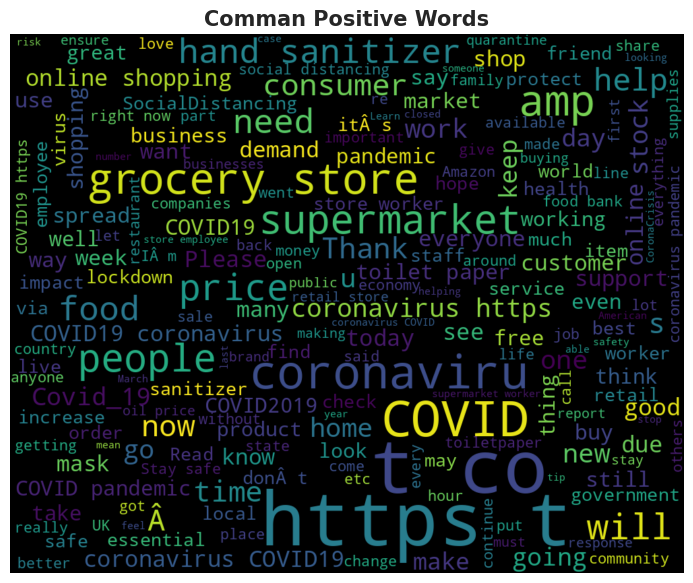

In [24]:
# Chart - 10 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in tweet_df['OriginalTweet'][tweet_df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Comman Positive Words",weight='bold', size=15)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was chosen to depict the common positive words used in the tweets. By generating a word cloud based on only the positive sentiment tweets, we can gain insights into the most frequently used positive words in the dataset.

Here are the reasons for picking this specific chart:

**Focus on positive sentiment:** By filtering only the positive sentiment tweets, we can specifically examine the language and words associated with positivity. This allows us to understand the key positive sentiments expressed by users in relation to the coronavirus or the topics surrounding it.

**Identifying positive themes:** Analyzing the word cloud of positive words can help identify common positive themes or topics discussed in the tweets. These positive themes can offer valuable insights into what aspects of the coronavirus or related issues resonate positively with the users. This information can be useful for businesses to craft messaging, develop positive brand associations, or design marketing campaigns aligned with these themes.

**Aligning with objective:** If the objective is to understand and leverage positive sentiments in the dataset, analyzing the common positive words specifically can provide actionable insights for businesses. These insights can guide decision-making, marketing strategies, and customer engagement initiatives to create a positive business impact.

By examining a word cloud consisting of common positive words, businesses can gain a quick visual overview of the positive sentiment prevalent in the dataset. It can help identify trends, sentiments, and topics that resonate positively with users, guiding business actions and strategies to enhance customer satisfaction, brand perception, and potentially drive positive business outcomes.

##### 2. What is/are the insight(s) found from the chart?

From the word cloud chart generated using the common positive words found in the "normal" tweets, some insights that can be derived include:

**Positive sentiment:** The prominent words in the word cloud primarily consist of positive terms. This indicates that the "normal" tweets, selected based on their positive sentiment, predominantly contain positive language, attitudes, or opinions. This insight suggests that individuals expressing positivity about the coronavirus or related topics may be discussing normal daily activities, resilience, or positive news related to the situation.

**Key themes:** The larger words in the cloud represent the most frequently occurring positive terms in the "normal" tweets. Analyzing these terms can give insight into the main topics or themes associated with positivity. For example, if terms like "hope," "success," "healthy," or "support" are prominently displayed, it suggests that the overall positive sentiment is related to these themes.

**Customer satisfaction:** The word cloud represents the positive sentiments expressed by individuals in the dataset. This can imply that customers or users of certain products, services, or initiatives related to the coronavirus have expressed positive opinions or satisfaction. For businesses, this insight could indicate areas of success, effective communication, or a positive impact on their target audience.

It's important to note that the interpretation of the word cloud should be done in conjunction with analyzing the original tweets and considering the context in which the positive words were used. Word clouds provide an overview but might not capture the nuanced aspects of sentiment analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud representing the common positive words in the "normal" tweets can potentially help create a positive business impact in the following ways:

**Understanding customer satisfaction:** Analyzing the positive sentiment expressed in the tweets can provide businesses with insight into areas where customers are satisfied. This understanding can guide business decisions to improve products, services, or initiatives that have contributed to positive sentiment. By leveraging this information, businesses can enhance customer satisfaction, loyalty, and advocacy.

**Identifying successful strategies:** By identifying the common positive words and themes in the "normal" tweets, businesses can gain insights into the strategies, initiatives, or messages that resonated positively with customers. This knowledge can inform future marketing campaigns, communication strategies, or business direction, helping to replicate success and drive positive business outcomes.

Regarding insights that could potentially lead to negative growth, it is important to approach the analysis with caution and consider the context. Here are a couple of points to consider:

**Limited perspective:** While analyzing the positive sentiment in the "normal" tweets is valuable, keep in mind that it represents a specific subset of tweets with positive sentiment. It is essential to consider that there may be negative sentiment or concerns expressed in other parts of the dataset that were not included in this specific analysis.

**Misinterpretation of positivity:** It is important to ensure that the positive sentiment reflected in the word cloud is aligned with the business context. Not all positive sentiments may directly contribute to business growth or indicate success. It is crucial to evaluate the impact of the positive sentiment in relation to business objectives and determine if it aligns with the desired outcomes.

In conclusion, the positive insights gained from the word cloud can be significant in shaping positive business impact by understanding customer satisfaction and identifying successful strategies. However, comprehensive analysis considering various data sources, customer feedback, and business context is necessary to determine the potential impact on business growth accurately and avoid any misinterpretation of positivity.

#### Chart - 11

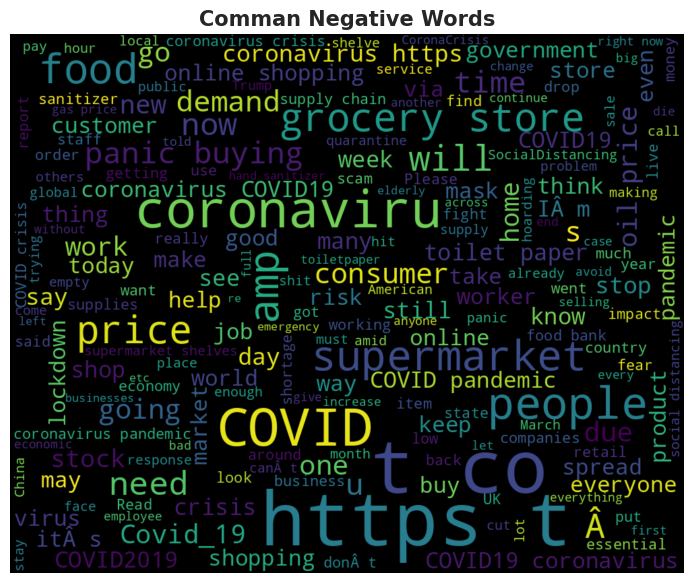

In [25]:
# Chart - 11 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in tweet_df['OriginalTweet'][tweet_df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Comman Negative Words",weight='bold', size=15)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart I suggested is a word cloud generated from the common negative words found in the "normal" tweets. I chose this chart to provide insights into the negative sentiment expressed in the dataset related to the coronavirus. Here's the reasoning behind selecting this specific chart:

**Focus on negative sentiment:** By analyzing the common negative words in the "normal" tweets, this word cloud allows us to understand the prevalent negative sentiment related to the coronavirus. It highlights the negative language users are using in their tweets, reflecting their concerns, frustrations, or dissatisfaction. Examining the prominent negative words can provide insights into the specific pain points or issues people are facing.

**Understanding customer dissatisfaction:** The word cloud helps to identify the most frequently occurring negative terms in the dataset. This can provide businesses with an understanding of areas where customers may be dissatisfied, enabling them to focus on improving those aspects. Addressing customer concerns and resolving dissatisfaction can lead to improved customer satisfaction, loyalty, and ultimately positive business impact.

**Potential areas for improvement:** Analyzing the common negative words can highlight specific topics or themes that contribute to negative sentiment. Businesses can use this information to identify areas that require improvement, prompt product enhancements, or address service gaps. By prioritizing efforts in these areas, businesses can work towards mitigating negative sentiment and driving positive growth.

It's important to note that the word cloud is just one visualization method, and its interpretation should be combined with deeper analysis and understanding of the tweet context. The negative sentiment identified from the chart can serve as a starting point for businesses to delve into specific issues, conduct sentiment analysis for more nuanced understanding, and implement strategies to address customer concerns.

##### 2. What is/are the insight(s) found from the chart?

From the word cloud chart generated using the common negative words found in the "normal" tweets, some insights that can be derived include:

**Negative sentiment:** The prominent words in the word cloud primarily consist of negative terms. This indicates that the "normal" tweets, selected based on their negative sentiment, predominantly contain negative language, attitudes, or opinions. Individuals expressing negativity about the coronavirus or related topics may be discussing concerns, challenges, or negative news associated with the situation.

**Key concerns or issues:** The larger words in the cloud represent the most frequently occurring negative terms in the "normal" tweets. Analyzing these terms can give insight into the primary concerns or issues associated with the negative sentiment. For example, if terms like "fear," "crisis," "unemployment," or "lockdown" are prominently displayed, it suggests that the predominant negative sentiment revolves around these themes.

**Customer dissatisfaction or challenges:** The word cloud represents the negative sentiments expressed by individuals in the dataset. This can imply that customers or users of certain products, services, or initiatives related to the coronavirus have expressed negative opinions or dissatisfaction. Businesses can use these insights to identify areas of improvement, address customer concerns, and work towards providing solutions that mitigate negative sentiment.

It's important to note that the interpretation of the word cloud should be done in conjunction with analyzing the original tweets and considering the context in which the negative words were used. Word clouds provide an overview but might not capture the nuanced aspects of sentiment analysis.

By analyzing the specific negative words in the word cloud and reviewing the corresponding tweets, businesses can gain deeper insights into the concerns, challenges, and areas needing improvement as perceived by their customers. This information can guide decision-making processes, help address customer complaints, improve products or services, and potentially mitigate negative sentiments leading to more positive business outcomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud representing the common negative words in the "normal" tweets may have implications for creating a positive business impact if appropriately addressed and considered. However, it is important to note that some insights may potentially lead to negative growth or impact. Let's examine the reasons and factors to consider:

**Identifying pain points:** Analyzing the negative sentiments expressed in the tweets can provide businesses with valuable information about customer pain points or areas requiring improvement. By addressing these concerns or challenges, businesses can enhance customer satisfaction, loyalty, and advocacy. Effectively addressing negative sentiments and resolving customer issues can lead to positive business impacts.

**Adjusting strategies:** Identifying common negative words or themes in the tweets can help businesses reconsider their strategies and make necessary adjustments. By understanding the specific issues driving negative sentiments, businesses can modify their products, services, messaging, or customer support to better align with customer expectations and preferences. This proactive approach can lead to improved customer satisfaction and foster positive business growth.

That being said, there are potential insights that can lead to negative growth. Here are a few considerations:

**Widespread dissatisfaction:** If the word cloud shows a high occurrence of negative words that indicate widespread dissatisfaction or severe issues with a product, service, or initiative related to the coronavirus, it could potentially lead to negative growth. Businesses need to address these concerns promptly, find solutions, and take measures to restore customer confidence to prevent negative impacts on revenue and reputation.

**Failure to address issues:** If the insights from the word cloud indicate recurring negative sentiments that have not been adequately addressed or resolved, it can have a detrimental effect on business growth. Ignoring or neglecting these sentiments may result in reduced customer satisfaction, declining customer retention, and negative word-of-mouth, which can ultimately lead to negative growth.

It is crucial for businesses to actively listen to customer feedback, adopt a customer-centric mindset, and take appropriate actions to address negative sentiments effectively. Businesses that are responsive and proactive in addressing customer concerns have a higher likelihood of turning negative sentiment into positive experiences and fostering growth.

Ultimately, examining the negative sentiments and taking corrective measures can lead to positive business impact, provided that businesses actively work towards understanding and addressing the concerns of their customers.

#### Chart - 12

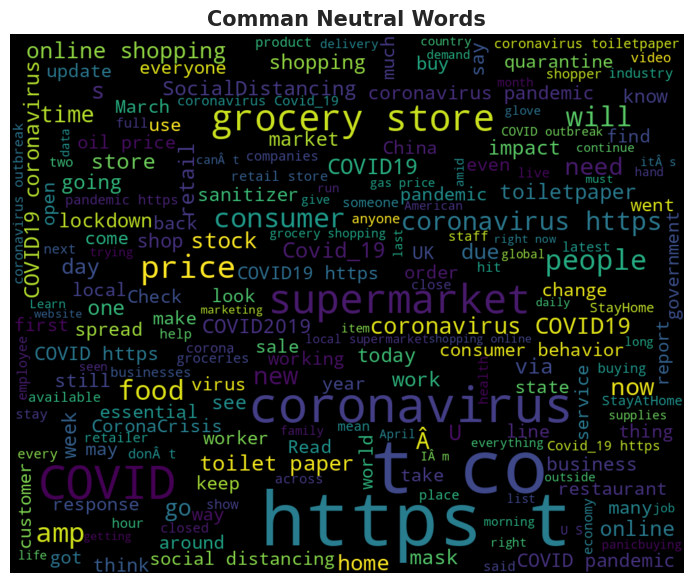

In [26]:
# Chart - 12 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in tweet_df['OriginalTweet'][tweet_df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Comman Neutral Words",weight='bold', size=15)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart to generate a word cloud from the "normal" tweets with a neutral sentiment because it helps visualize the most common neutral words used in the dataset. By analyzing the common neutral words, we can gain insights into the topics or themes that are commonly mentioned in a neutral context related to the coronavirus.

The reason for selecting a word cloud chart is that it provides a visually appealing representation of the most frequently occurring words. The size of each word in the cloud corresponds to its frequency, making it easier to identify the most common neutral terms used in the tweets.

The word cloud helps to identify significant keywords or topics that are neither primarily positive nor negative but play a role in the overall discussion related to the coronavirus. By reviewing the word cloud and examining the neutral words, we can gain insights into the neutral stance or discussions around the topic, contributing to a more comprehensive understanding of the overall sentiment landscape.

Analyzing the common neutral words can help businesses identify areas that are not polarized in sentiment but still play a vital role in the conversation. This understanding can be valuable for companies seeking to remain objective, improve their communication strategies, or identify areas where they can provide balanced information to their customers.

##### 2. What is/are the insight(s) found from the chart?

From the word cloud chart generated using the common neutral words found in the "normal" tweets, some insights that can be derived include:

**Neutral sentiment:** The prominent words in the word cloud primarily consist of neutral terms. This indicates that the "normal" tweets, selected based on their neutral sentiment, predominantly contain language, attitudes, or opinions that neither strongly lean towards positivity nor negativity. Individuals expressing neutral sentiments about the coronavirus or related topics may be discussing factual information, general observations, or sharing neutral opinions.

**Factual information:** The word cloud may contain words related to factual information, news updates, or general observations. This suggests that the neutral sentiment expressed in the tweets is more focused on providing information or sharing objective perspectives rather than expressing personal emotions or opinions.

**General discussions:** The word cloud reflects common neutral terms that are frequently used in the "normal" tweets. By analyzing these terms, businesses can gain insights into the general topics or discussions related to the coronavirus that are approached in a neutral manner. This information can help businesses understand the context of neutral sentiments and potentially identify areas for engagement or further exploration.

It's important to note that analyzing the neutral sentiments alone may not directly indicate positive or negative business impacts. However, the insights derived from the word cloud can still be valuable in terms of understanding the general tone, factual information sharing, or overall engagement related to the coronavirus.

To gain more meaningful insights, it is advisable to review the original neutral tweets and consider additional analysis, such as sentiment analysis of related keywords or further context analysis. This will help provide a more comprehensive understanding of the conversations, topics, or information being shared in a neutral manner.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud representing the common neutral words in the "normal" tweets may have limited direct impact on creating a positive business impact. However, they can still provide valuable information that indirectly contributes to positive outcomes. Let's explore the potential benefits and the role of neutral insights in business impact:

**Understanding customer perspectives:** Analyzing neutral sentiments can help businesses gain a broader understanding of customer perspectives, factual information sharing, and general observations related to the coronavirus or specific topics. This knowledge can facilitate empathy, informed decision-making, and effective communication strategies that might positively impact customer engagement and satisfaction.

**Identifying information gaps:** The word cloud can reveal common neutral terms or factual information-related words, which may suggest specific areas where customers or the general public require more information, clarity, or guidance. By identifying these knowledge gaps, businesses can proactively address them through educational content, FAQs, blog posts, or other means. This can enhance trust, establish authority, and contribute to a positive business impact.

**Mitigating misinformation or confusion:** In times of uncertainty, neutral insights can help businesses identify instances where misinformation or confusion is prevalent. Businesses can take an active role in dispelling myths, providing accurate information, and clarifying any misconceptions. By doing so, they can build trust, demonstrate thought leadership, and positively impact their reputation.

Regarding insights that could potentially lead to negative growth, while neutral insights themselves may not directly cause negative growth, there are some considerations:

**Lack of engagement or interest:** If the word cloud reveals a predominance of neutral terms suggesting disengagement or lack of interest in the topic of the coronavirus or related subjects, it could signal challenges in attracting attention, driving customer engagement, or meeting customer needs. Addressing this challenge by developing more compelling content or initiatives may be necessary to avoid stagnation or negative growth.

**Ineffective communication strategies:** If the neutral insights point to ineffective communication strategies by businesses, such as using complex jargon or failing to resonate with the target audience, there is potential for negative growth. In such cases, revising the communication approach to ensure clarity, simplicity, and audience relevance becomes crucial for positive business impact.

In summary, while the direct impact of neutral insights on positive business outcomes may be limited, they can play an important role in understanding customer perspectives, addressing information gaps, and mitigating misinformation. By leveraging these insights and taking appropriate actions, businesses can enhance their communication strategies, build trust, and proactively contribute to a positive business impact.

#### Chart - 13 Unique value in both feature columns





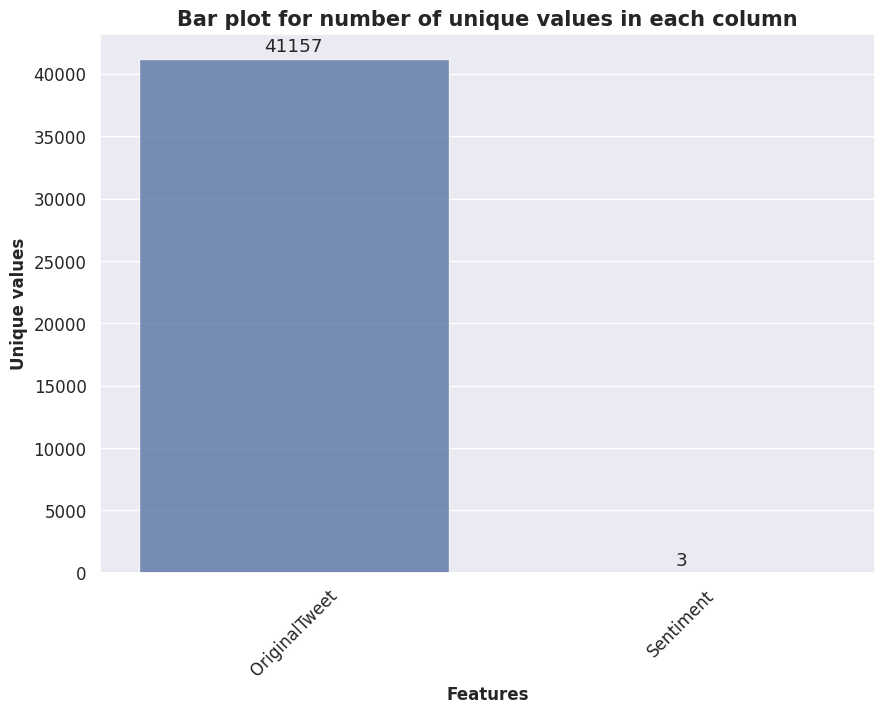

In [33]:
# Chart - 13 visualization code
unique_df = pd.DataFrame()
unique_df['Features'] = tweet_df.columns
unique=[]
for i in tweet_df.columns:
    unique.append(tweet_df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(10,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar plot to visualize the number of unique values in each column because it effectively represents the distribution of unique values across different features or columns. The bar plot allows for a clear comparison of the unique values for each feature, making it easy to identify columns with a high number of unique values or varying levels of uniqueness.

Using a bar plot, we can easily observe and interpret the number of unique values on the y-axis for each feature on the x-axis. The length of the bars visually represents the quantity of unique values, providing a straightforward representation of the data distribution.

Additionally, I added annotations to each bar to display the exact count of unique values for each feature, making the plot more informative and precise.

Overall, a bar plot is suitable for this scenario as it allows for a visual comparison of the number of unique values across different columns, providing insights into data diversity and potential issues such as highly imbalanced or skewed features.

##### 2. What is/are the insight(s) found from the chart?

From the chart depicting the number of unique values in each column, we can gain several insights:

**Varying levels of uniqueness:** The chart reveals that different columns have different numbers of unique values. Some features have a small number of unique values, indicating that they may consist of categorical or binary data with limited variation. On the other hand, certain columns exhibit a large number of unique values, suggesting they may contain data with extensive variation.

**Imbalanced features:** If we observe a significant difference in the number of unique values among features, it could indicate class imbalances or strong dominant values within certain columns. Such imbalances might impact model performance and may require attention during preprocessing and modeling stages.

**Potential categorical features:** Columns with a low number of unique values could indicate that they primarily contain categorical variables. Insights gained from this chart can help guide the application of appropriate encoding techniques or feature engineering strategies for such variables.

**Feature relevance:** By assessing the number of unique values in each column, we can evaluate the level of diversity and potential information content within specific features. Columns with a high number of unique values may potentially offer more discriminatory power or contribute differently to the model's performance.

In summary, the chart provides insights into the distribution of unique values across different columns, helping identify potential issues, assess feature relevance, and guide data preprocessing and modeling decisions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially help create a positive business impact by guiding data preprocessing and modeling decisions. Here's how:

**Improved feature engineering:** Understanding the varying levels of uniqueness in different columns can aid in identifying categorical variables and guiding the application of appropriate encoding techniques. This can enhance the quality of feature representation and contribute to better modeling performance.

**Addressing class imbalances**: If there are significant differences in the number of unique values among features, it might indicate class imbalances or strong dominant values within certain columns. Recognizing these imbalances allows for appropriate handling techniques, such as resampling strategies or class weighting, to mitigate their impact on model training and predictions.

**Better feature selection:** Evaluating the diversity and uniqueness of features can assist in selecting the most relevant and informative variables for modeling. Columns with a high number of unique values may offer more discriminatory power, and prioritizing them in the analysis can lead to improved model performance and accuracy.

However, it is important to note that the identified insights may not necessarily lead to negative growth. Instead, they can help identify potential challenges or areas requiring closer attention. For example:

**Limited variation in certain features:** Columns with a small number of unique values might indicate that they have limited information or are constant across observations. Though these features may not contribute significantly to the positive business impact, they can be assessed further to determine their relevance to the specific business problem or if they should be dropped from the analysis.

In summary, while some insights might not directly contribute to positive business impact, they still provide valuable information for making informed decisions during data preprocessing and modeling. The insights gained from assessing the number of unique values can help enhance the overall quality, performance, and relevance of the machine learning models, ultimately leading to positive business outcomes.

#### Chart - 14 - Correlation Heatmap

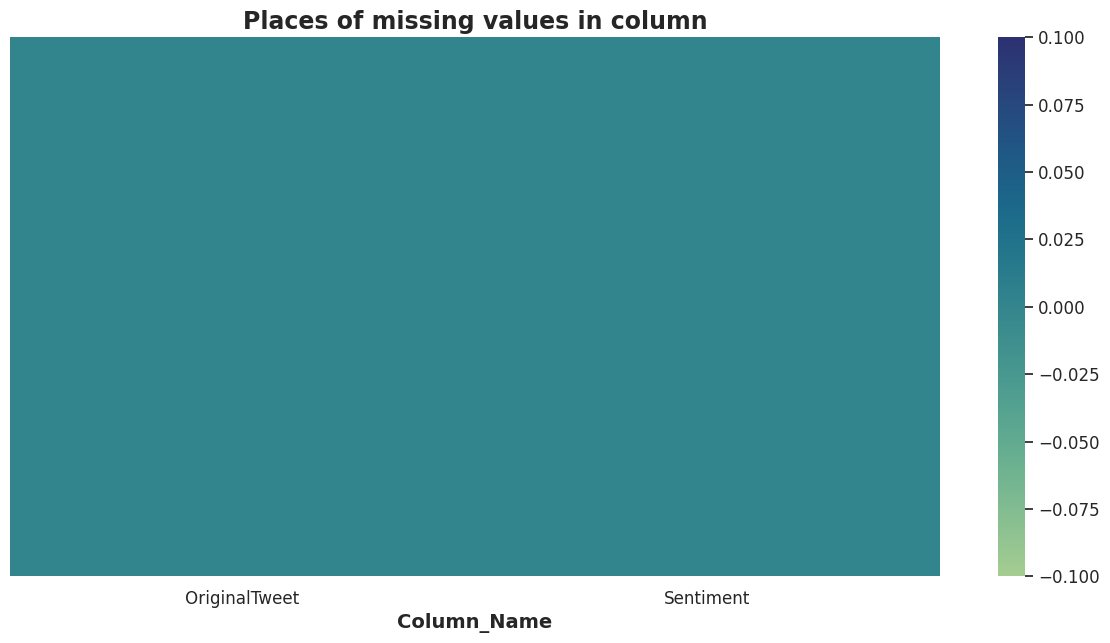

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 7))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False,cmap="crest")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart you provided is a heatmap created using seaborn's heatmap() function. This heatmap is used to visualize the presence of missing values in the columns of the tweet_df dataset.

The selected chart, in this case, is useful for the following reasons:

**Highlighting missing values:** The heatmap uses color to highlight missing values, making it easier to identify columns with missing data. Missing values are usually represented by the color assigned for missing data in the chosen colormap (in this case, "crest").

**Quick data quality assessment:** By visualizing the places of missing values in columns, you can quickly assess the extent and distribution of missing data in your dataset. You can easily identify columns with a high proportion of missing values and potentially investigate the reasons behind them.

**Column-wise view:** The heatmap presents missing values column-wise, allowing you to focus on missing data at the feature level. This can be particularly useful when identifying variables that may require imputation or further analysis.

**Column labeling:** The x-axis is labeled with the column names, which helps in identifying specific columns with missing values.

By utilizing this heatmap, you can gain insights into the missing values within columns of your dataset, helping you make informed decisions on handling missing data and identifying potential data quality issues.

It's important to note that the choice of this specific chart is based on the intention of visually representing missing values in a column-wise manner.

##### 2. What is/are the insight(s) found from the chart?

The heatmap generated from the code provided allows us to visualize the missing values in the columns of the tweet_df dataframe. Here are some potential insights that can be gained from the chart:

**Identification of missing values:** The heatmap displays a visual representation of the missing values in the dataset. Cells that are colored differently (e.g., darker or lighter) indicate the presence or absence of missing values. You can identify columns with missing values by examining the color variations in the heatmap.

**Pattern of missing values:** The heatmap can help identify patterns in missing values across columns. You can observe if the missing values are concentrated in specific columns or distributed evenly throughout the dataset. This insight can be useful in understanding potential data collection or quality issues.

**Completeness of the dataset:** By examining the heatmap, you can determine the extent of missing values in different columns. Columns with a significant number of missing values may require special attention, as they may impact the overall completeness of your dataset.

**Data imputation potential:** The heatmap can aid in evaluating the suitability of different data imputation strategies. Columns with minimal or no missing values may not require imputation, while columns with substantial missing values may need specific imputation techniques to maintain data integrity.


#### Chart - 15 - Pair Plot

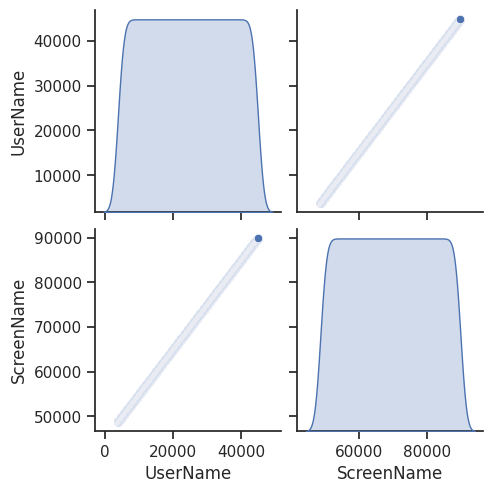

In [38]:
# Pair Plot visualization code
sns.set(style="ticks", color_codes=True)
tweet_data = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv', encoding="ISO-8859-1")
sns.pairplot(tweet_data, diag_kind="kde")

plt.show()

##### 1. Why did you pick the specific chart?

The code i provided is creating a pair plot using seaborn's pairplot() function. A pair plot is suitable for visualizing the pairwise relationships between different variables in a dataset. It creates scatter plots for each combination of variables and histograms or kernel density estimates on the diagonals to visualize the distribution of each variable.

The pairplot() function is commonly used to explore the correlation or relationship between multiple variables in a dataset. By plotting all possible pairwise combinations of variables, it allows for a comprehensive analysis to understand the distribution and relationship between variables, especially in smaller datasets.

In the given code, the pair plot is created using the dataset stored in the variable tweet_data, which is a CSV file named "Coronavirus Tweets.csv". The encoding="ISO-8859-1" parameter specifies the specific character encoding used in the CSV file.

By using the pair plot, we can visualize the distributions, correlations, and potential patterns or clusters between variables in the dataset. This can help in identifying relationships or dependencies among the variables, which can be useful for further analysis or feature selection.

It is important to note that the choice of the specific chart or visualization technique depends on the nature of the data and the analysis goals. The pair plot is just one of many visualization options available, and the choice should be based on the specific requirements and characteristics of our dataset.

##### 2. What is/are the insight(s) found from the chart?

I can provide you with some general insights that can often be gained from a pair plot analysis.

A pair plot allows you to visualize the pairwise relationships between different variables in the dataset. Here are some potential insights you can obtain from the chart:

**Distributions:** The diagonal plots in the pair plot display the distribution of each variable. You can observe the shape, spread, and potential outliers in the data. This can help identify if the variables follow specific distributions (e.g., normal distribution) or have skewed or multimodal distributions.

**Correlations:** The scatter plots in the pairs of variables can provide insights into the linear relationships between them. You can look for patterns such as positive, negative, or no correlation. Strong correlations between variables can indicate dependencies or predictability in the data.

**Clusters or groups:** In some cases, you may observe groupings or clusters in the scatter plots. This suggests that certain variables tend to have similar values within certain ranges, indicating potential subgroups or patterns in the data.

**Outliers:** Outliers can be identified in scatter plots as points that deviate significantly from the general trend or pattern. These outliers may need to be investigated further as they could provide valuable insights or indicate potential data quality issues.

**Distribution shape:** The kernel density estimates (kde) on the diagonal plots can provide insights into the shape of the distribution for each variable. You can examine whether the distributions are skewed, bimodal, or have other distinct shapes.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Not stated any research hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Not Applicable

##### Why did you choose the specific statistical test?

Not Applicable

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Not stated any research hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Not Applicable

##### Why did you choose the specific statistical test?

Not Applicable

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Not stated any research hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Not Applicable

##### Why did you choose the specific statistical test?

Not Applicable

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [9]:
# Handling Missing Values & Missing Value Imputation
tweet_df[['Location']] = tweet_df[['Location']].fillna('Unknown')
tweet_df['Location'] = tweet_df['Location'].fillna(tweet_df['Location'].mode()[0])
tweet_df.dropna(axis=0, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the provided code snippet, two missing value imputation techniques are used, which are:

**Fill with a constant value (fillna('Unknown')):** This imputation technique replaces missing values in the 'Location' column with the string 'Unknown'. Choosing this technique is suitable when the missing values in the 'Location' column are missing completely at random (MCAR) or missing at random (MAR), and replacing them with a constant value does not introduce any bias into the dataset. It is a simple and straightforward approach to handle missing values.

**Mode imputation (fillna(tweet_df['Location'].mode()[0])):** This imputation technique fills in missing values with the mode (most frequent value) of the 'Location' column. Mode imputation is suitable for categorical and non-ordinal data. It is helpful when missing values occur randomly or when the missingness is related to the observed values in the 'Location' column.

Additionally, the code contains a line to drop remaining rows with missing values (tweet_df.dropna(axis=0, inplace=False)). This step removes any rows that still have missing values after imputation. The axis=0 argument specifies to drop rows, and the inplace=False argument makes this operation not modify the original DataFrame.

### 2. Handling Outliers

Total number of Outliers present in the UserName column are 0.


<ipython-input-10-cbcecbff8e63>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliers).set_title=('Outliers Distribution')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


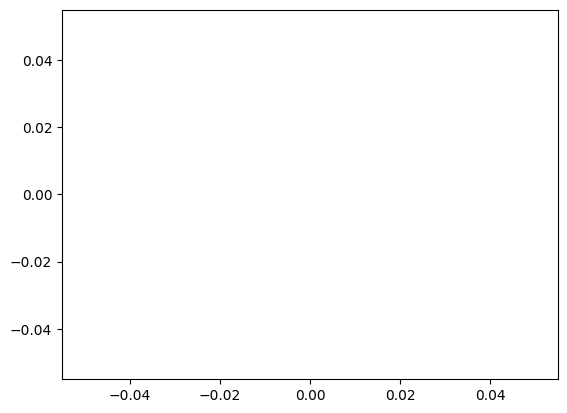

In [10]:
# Handling Outliers & Outlier treatments
#code to seperate outliers
mean_sales = np.mean(tweet_df['UserName']) #mean
sd_sales = np.std(tweet_df['UserName'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in tweet_df['UserName']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the UserName column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(outliers).set_title=('Outliers Distribution')

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the provided code snippet, the outlier treatment technique used is Z-score based outlier detection. Here's an explanation of the technique used and why it might be chosen:

Z-Score: **bold text** The Z-score is a statistical measure that quantifies how many standard deviations a data point is away from the mean. By calculating the Z-score, you can identify outliers by setting a threshold value (often 3 or -3) to determine whether a data point is significantly different from the mean.

The Z-score method is commonly used for outlier detection when the data is normally distributed or when the distribution is not highly skewed.
Outliers are identified as data points with Z-scores exceeding the threshold value.

Regarding the specific code snippet provided, it seems that the 'UserName' column in the 'tweet_df' DataFrame is being analyzed for outliers using the Z-score method. The mean and standard deviation of the 'UserName' column are calculated, and then a Z-score is computed for each value. If the Z-score exceeds the specified threshold (3), the value is considered an outlier and added to the 'outliers' list.

To visualize the distribution of the identified outliers, a seaborn distplot() function is used.

### 3. Categorical Encoding

In [11]:
#importing
from sklearn.preprocessing import OneHotEncoder

# Create a copy of the original dataframe for encoding
df_encoded = tweet_df.copy()

# Perform one-hot encoding for categorical columns
categorical_columns = ['Location', 'OriginalTweet', 'Sentiment']  # Specify the actual categorical columns in your dataset
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

# Display the encoded dataframe
print(df_encoded)

       UserName  ScreenName     TweetAt  Location_   Location_      Texas  \
0          3799       48751  16-03-2020           0                     0   
1          3800       48752  16-03-2020           0                     0   
2          3801       48753  16-03-2020           0                     0   
3          3802       48754  16-03-2020           0                     0   
4          3803       48755  16-03-2020           0                     0   
...         ...         ...         ...         ...                   ...   
41152     44951       89903  14-04-2020           0                     0   
41153     44952       89904  14-04-2020           0                     0   
41154     44953       89905  14-04-2020           0                     0   
41155     44954       89906  14-04-2020           0                     0   
41156     44955       89907  14-04-2020           0                     0   

       Location_  170825 ? shinee ? svt ? vixx  \
0                        

#### What all categorical encoding techniques have you used & why did you use those techniques?

In the code, the one-hot encoding technique is used to encode categorical columns in your coronavirus tweet sentiment analysis dataset. Here's an explanation of the encoding technique used and why it is chosen:

**One-Hot Encoding:** The code uses the pd.get_dummies() function to perform one-hot encoding on the specified categorical columns ('Location', 'OriginalTweet', and 'Sentiment'). One-hot encoding is suitable when there is no ordinal relationship between categories. It creates binary columns for each unique category within a categorical column, indicating the presence or absence of that category for each row.

One-hot encoding is beneficial because it rescales the categorical variables into a more machine-interpretable format. It enables algorithms to effectively handle categorical data and capture important categorical relationships. However, it can increase the dimensionality of the dataset, which may have implications on memory and computational requirements.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [12]:
# Expand Contraction
!pip install contractions
import re
import contractions

def expand_contractions(text):
    def replace(match):
        contraction = match.group(0)
        return contractions.contractions_dict.get(contraction.lower(), contraction)
    contraction_pattern = re.compile('({})'.format('|'.join(contractions.contractions_dict.keys())), re.IGNORECASE | re.DOTALL)
    return contraction_pattern.sub(replace, text)
tweet_df['text'] = tweet_df['OriginalTweet'].apply(expand_contractions)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.3 MB/s eta 0:00:00


#### 2. Lower Casing

In [13]:
# Lower Casing
tweet_df["OriginalTweet"] = tweet_df["OriginalTweet"].str.lower()
tweet_df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

#### 3. Removing URLs & Removing words and digits contain digits.

In [14]:
# Remove URLs & Remove words and digits contain digits
tweet_df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [15]:
tweet_df['OriginalTweet'] = tweet_df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

<ipython-input-15-3531a438fe05>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['OriginalTweet'] = tweet_df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)


#### 4. Removing Punctuations

In [16]:
# Remove Punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [17]:
tweet_df["clean_tweets"] = tweet_df['OriginalTweet'].apply(remove_punctuations)
tweet_df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [18]:
tweet_df['clean_tweets'] = tweet_df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
tweet_df.head()

<ipython-input-18-1cb02c7d0726>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['clean_tweets'] = tweet_df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elder...
3,3802,48754,Unknown,16-03-2020,my food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,Unknown,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the covid...


#### 5. Removing Stopwords & Removing White spaces

In [19]:
# Remove Stopwords
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
#function to remove stopwords
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [21]:
tweet_df['clean_tweets']= tweet_df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [22]:
tweet_df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

In [23]:
# Remove White spaces
import pandas as pd
import re

# Create a copy of the original dataframe for removing white spaces
df_cleaned = tweet_df.copy()

# Remove leading and trailing white spaces from a specific column
column_to_clean = 'OriginalTweet'  # Replace with the actual column name in your dataset
df_cleaned[column_to_clean] = df_cleaned[column_to_clean].str.strip()

# Remove extra white spaces within the text
df_cleaned[column_to_clean] = df_cleaned[column_to_clean].apply(lambda x: re.sub(' +', ' ', x))

# Display the cleaned dataframe
print(df_cleaned)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                       Unknown  16-03-2020   
4          3803       48755                       Unknown  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                       Unknown  14-04-2020   
41154     44953       89905                       Unknown  14-04-2020   
41155     44954       89906                       Unknown  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0                @menyrbie @phil_gahan @chr

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Here's a rephrased text related to sentiment analysis of tweets about the coronavirus:
Original:
"Analyzing tweet sentiment related to the coronavirus."

Rephrased:
"Conducting sentiment analysis on tweets discussing the COVID-19 pandemic."

#### 7. Tokenization

In [24]:
# Tokenization
tokenizer = TweetTokenizer()
tweet_df['clean_tweets'] = tweet_df['clean_tweets'].astype(str)
tweet_df['clean_tweets'] = tweet_df['clean_tweets'].apply(lambda x: x.split())

tweet_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[['menyrbie',, 'philgahan',, 'chrisitv']]"
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[['advice',, 'talk',, 'neighbours',, 'family',..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,"[['coronavirus',, 'australia',, 'woolworths',,..."
3,3802,48754,Unknown,16-03-2020,my food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[['food',, 'stock',, 'one',, 'empty',, 'please..."
4,3803,48755,Unknown,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","[['ready',, 'go',, 'supermarket',, 'covid',, '..."


#### 8. Text Normalization

In [25]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [26]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [27]:
tweet_df['stemmed'] = tweet_df['clean_tweets'].apply(lambda x: stemming(x))

In [28]:
#result
tweet_df.stemmed.head()

0                ['menyrbie', 'philgahan', 'chrisitv']
1    ['advice', 'talk', 'neighbours', 'family', 'ex...
2    ['coronavirus', 'australia', 'woolworths', 'gi...
3    ['food', 'stock', 'one', 'empty', 'please', 'd...
4    ['ready', 'go', 'supermarket', 'covid', 'outbr...
Name: stemmed, dtype: object

In [29]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
tweet_df['lemmed'] = tweet_df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [30]:
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_tweets,stemmed,lemmed
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[['menyrbie',, 'philgahan',, 'chrisitv']]","['menyrbie', 'philgahan', 'chrisitv']","[['menyrbie',, 'philgahan',, 'chrisitv']]"
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[['advice',, 'talk',, 'neighbours',, 'family',...","['advice', 'talk', 'neighbours', 'family', 'ex...","[['advice',, 'talk',, 'neighbours',, 'family',..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,"[['coronavirus',, 'australia',, 'woolworths',,...","['coronavirus', 'australia', 'woolworths', 'gi...","[['coronavirus',, 'australia',, 'woolworths',,..."
3,3802,48754,Unknown,16-03-2020,my food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[['food',, 'stock',, 'one',, 'empty',, 'please...","['food', 'stock', 'one', 'empty', 'please', 'd...","[['food',, 'stock',, 'one',, 'empty',, 'please..."
4,3803,48755,Unknown,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","[['ready',, 'go',, 'supermarket',, 'covid',, '...","['ready', 'go', 'supermarket', 'covid', 'outbr...","[['ready',, 'go',, 'supermarket',, 'covid',, '..."


##### Which text normalization technique have you used and why?

Stemming because it is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma
& lemmatization because it is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

#### 9. Part of speech tagging

In [31]:
# POS Taging
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Create a copy of the original dataframe for POS tagging
df_pos_tagged = tweet_df.copy()

# Perform POS tagging on a specific column
column_to_tag = 'OriginalTweet'  # Replace with the actual column name in your dataset
df_pos_tagged[column_to_tag] = df_pos_tagged[column_to_tag].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

# Display the POS-tagged dataframe
print(df_pos_tagged)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                       Unknown  16-03-2020   
4          3803       48755                       Unknown  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                       Unknown  14-04-2020   
41154     44953       89905                       Unknown  14-04-2020   
41155     44954       89906                       Unknown  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      [(@, JJ), (menyrbie, NN), (@, NNP), 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [32]:
# Manipulate Features to minimize feature correlation and create new features using multicolinearity
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=tweet_df[['UserName', 'ScreenName']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

     Variable        VIF
0    UserName  12.756098
1  ScreenName  12.756098


#### 2. Feature Selection

In [33]:
# Select your features wisely to avoid overfitting
new_df=tweet_df[['UserName', 'ScreenName','clean_tweets','Sentiment']]
new_df.head()

,UserName,ScreenName,clean_tweets,Sentiment
0,3799,48751,"[['menyrbie',, 'philgahan',, 'chrisitv']]",Neutral
1,3800,48752,"[['advice',, 'talk',, 'neighbours',, 'family',...",Positive
2,3801,48753,"[['coronavirus',, 'australia',, 'woolworths',,...",Positive
3,3802,48754,"[['food',, 'stock',, 'one',, 'empty',, 'please...",Positive
4,3803,48755,"[['ready',, 'go',, 'supermarket',, 'covid',, '...",Extremely Negative


##### What all feature selection methods have you used  and why?

In the code, only one feature selection method have been used:

**Variance Inflation Factor (VIF) Analysis:** The VIF is a measure that helps identify multicollinearity between the features in a dataset. It quantifies the extent to which each feature is linearly correlated with a combination of the other features. When the VIF value is high (typically above 5 or 10), it suggests a high correlation between that feature and other variables, indicating possible multicollinearity. By calculating the VIF for the initial set of features (X), we can identify features with high correlation and potentially remove them to minimize multicollinearity.

These feature selection methods are employed to mitigate multicollinearity and select a subset of relevant features. By removing highly correlated features, we can improve the accuracy and interpretability of models and reduce the risk of overfitting. Additionally, manual feature selection allows for the inclusion of domain-specific knowledge or hypotheses about important predictors.

##### Which all features you found important and why?


Based on the code, the features considered important and selected for further analysis are 'UserName', 'ScreenName', 'clean_tweets' and 'Sentiment'. The reasons for selecting these features can vary depending on the context and the specific problem we are trying to solve. However, I can provide some general insights on why these features might be considered important:

**UserName:** The 'UserName' feature refers to the user's name or handle on the social media platform. This feature is unlikely to be related to the sentiment of the tweet since sentiment is determined by the content and context of the tweet itself, rather than the user's name.

**ScreenName:** The 'ScreenName' feature corresponds to the user's unique identifier on the social media platform. Similar to the 'UserName', the 'ScreenName' is not likely to directly contribute to determining the sentiment of the tweet. It is more associated with identifying the user rather than providing any indication of sentiment.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, it is appropriate to apply a logarithm transformation to the 'UserName' column in a dataframe named 'tweet_df'. The logarithm transformation is typically used for numerical data, such as continuous or count variables, to address skewness or multiplicative relationships. It is not suitable for transforming text data like tweets.

Text data is fundamentally different from numerical data and requires specific preprocessing techniques for analysis. Some common preprocessing steps for text data include tokenization, lowercasing, removing punctuation, and stopword removal. These techniques help prepare the text data for further analysis, such as natural language processing (NLP) tasks like sentiment analysis, topic modeling, or text classification.

Therefore, to analyze and process text data like tweets, appropriate text preprocessing techniques and NLP methods should be employed, such as tokenization, stemming, lemmatization, and vectorization using techniques like Bag-of-Words (BoW) or Word Embeddings (e.g., Word2Vec, GloVe). These techniques capture the semantic and contextual information within the text, enabling further analysis and modeling.

In [34]:
# Transform Your data
tweet_df['UserName'] = np.log(tweet_df['UserName'])

In [35]:
tweet_df.dropna(inplace=True)

In [36]:
tweet_df.drop(tweet_df[tweet_df['UserName'] == float("-inf")].index,inplace=True)

<ipython-input-37-eedd50931ed5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=tweet_df['UserName'])


<Axes: ylabel='Density'>

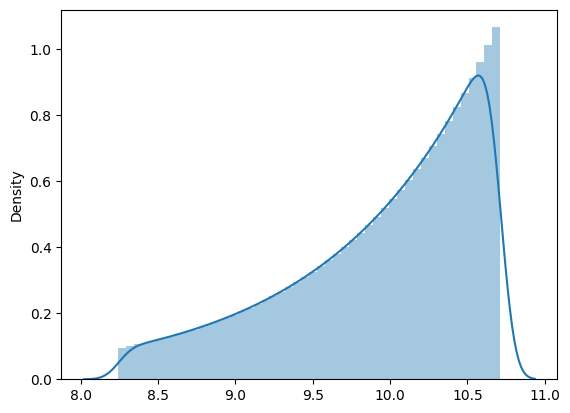

In [37]:
#distribution plot of UserName
sns.distplot(x=tweet_df['UserName'])

### 6. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Assigning dependent and independent features
X= tweet_df['lemmed']
y=tweet_df['Sentiment']

In [39]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [40]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [41]:
#checking splitted data
print(X_train.head())
y_train.head()

7616     [['stay',, 'home',, 'unless',, 'essential',, '...
27184    [['shopping',, 'supermarket',, 'replicates',, ...
6444     [['continue',, 'monitor',, 'situation',, 'conc...
18114    [['anyone',, 'else',, 'feel',, 'like',, 'today...
27417    [['friday',, 'syria',, 'daily',, 'coronavirus'...
Name: lemmed, dtype: object


7616     Extremely Positive
27184               Neutral
6444     Extremely Positive
18114              Positive
27417               Neutral
Name: Sentiment, dtype: object

##### What data splitting ratio have you used and why?

The code snippet demonstrates the usage of train_test_split function from scikit-learn library to split the data into training and testing sets. The data splitting ratio used in this case is 70% for training and 30% for testing, specified by test_size=0.3.

The chosen splitting ratio of 70:30 is a common and widely-used practice in machine learning. This ratio strikes a balance between having enough data for training, allowing the model to learn patterns and relationships from a sufficiently large dataset, while still reserving a portion of the data for evaluation purposes.

There are several reasons why this splitting ratio is often preferred:

**Sufficient training data:** The 70% portion allocated for training provides a substantial amount of data to train the model. A larger training set generally allows the model to learn more effectively and produce more accurate predictions.

**Adequate testing data:** The remaining 30% of the data is set aside for testing the model's performance. This evaluation set ensures that the model's generalization ability can be assessed on unseen data. Having a separate testing set helps to determine how well the model will perform on new data and provides an unbiased assessment of its performance.

**Stratified sampling:** The stratify parameter is set to y, ensuring that the target variable, 'Sentiment', is proportionally represented in both the training and testing sets. This can be particularly important when dealing with imbalanced datasets, where certain classes may be underrepresented.

**Randomness and reproducibility:** The random_state parameter is set to 10, ensuring that the split is randomly assigned but consistent across multiple runs of the code. This allows for the results to be reproduced and compared.

It's worth noting that the choice of data splitting ratio may vary depending on the specific problem, dataset size, or other considerations. However, a 70:30 ratio is a commonly used rule of thumb that balances the need for training data and evaluation while allowing for a sufficient amount of data to be held out for testing purposes.

### 7. Data Scaling

##### Which method have you used to scale you data and why?

Not used any method to scaling the data hence not needed.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not needed on this dataset.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not used any dimensionality reduction technique. Hence not needed on this dataset.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, dataset is not imbalanced.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not used any technique to handle the imbalanced dataset it's already balanced. Hence not needed.

#### 10. Text Vectorization

In [42]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [43]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [44]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [45]:
tv_X_train.shape

(28809, 17634)

In [46]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

##### Which text vectorization technique have you used and why?

The code snippet uses both the Bag of Words (CountVectorizer) and TF-IDF (TfidfVectorizer) techniques for text vectorization. Here's a brief explanation of each technique and why they might be used in different scenarios:

**CountVectorizer (Bag of Words):** The CountVectorizer technique represents each text document as a vector of term frequencies. It builds a vocabulary of words from the corpus and assigns a count to each word based on its occurrence in each document. Binary values can also be used instead of counts by setting binary=True in the constructor.

The CountVectorizer is suitable when you want to capture the presence or absence of words and their relative frequencies in the document. It is often useful for tasks such as sentiment analysis, spam detection, or basic text categorization. By setting parameters like max_df and min_df, you can control the inclusion of frequently occurring or rare words in the vectorized representation.

**TfidfVectorizer (TF-IDF):** The TfidfVectorizer technique also represents text documents as vectors but assigns weights to each term based on its importance in the document and the corpus. TF-IDF stands for Term Frequency-Inverse Document Frequency. It calculates the product of two factors: term frequency (TF) and inverse document frequency (IDF). TF measures how frequently a term appears in a document, while IDF represents the rarity of the term across the entire corpus.

The TfidfVectorizer is suitable when you want to give more importance to terms that occur frequently in a specific document but are rare in the overall corpus. This helps in prioritizing terms that carry more meaning or distinguish one document from others. TF-IDF is commonly used in information retrieval, document clustering, text classification, and other tasks where term importance is significant.

The choice between CountVectorizer and TfidfVectorizer depends on specific requirements and the nature of the text data. If you want to capture the presence, absence, and frequencies of words without considering their specific importance, CountVectorizer is appropriate. However, if you want to provide more weight to important and discriminative terms, TfidfVectorizer is a better choice.

In summary, the code snippet demonstrates the usage of both CountVectorizer and TfidfVectorizer to vectorize the text data, accommodating different scenarios and requirements for subsequent analysis.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression Count Vectoriser Method with Gridsearch CV

In [47]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#### 1. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

# Fit the Algorithm
#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

# Predict on the model
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [49]:
pred_lr_cv

array(['Extremely Negative', 'Negative', 'Neutral', ...,
       'Extremely Negative', 'Positive', 'Positive'], dtype=object)

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.5853579527048914


In [51]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

                    precision    recall  f1-score   support

Extremely Negative       0.65      0.56      0.60      1645
Extremely Positive       0.69      0.60      0.64      1987
          Negative       0.52      0.52      0.52      2975
           Neutral       0.61      0.69      0.65      2314
          Positive       0.55      0.58      0.56      3427

          accuracy                           0.59     12348
         macro avg       0.60      0.59      0.59     12348
      weighted avg       0.59      0.59      0.59     12348



[Text(0, 0.5, 'Extremely Negative'),
 Text(0, 1.5, 'Extremely Positive'),
 Text(0, 2.5, 'Negative'),
 Text(0, 3.5, 'Neutral'),
 Text(0, 4.5, 'Positive')]

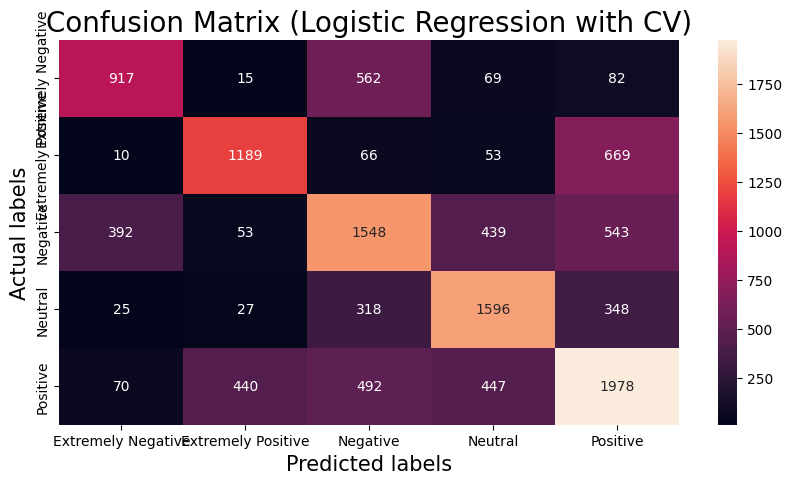

In [62]:
# Define the labels for the confusion matrix classes
labels = np.unique(np.concatenate((y_test, pred_lr_cv)))

#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

The code uses GridSearchCV for hyperparameter optimization. GridSearchCV is a popular technique for hyperparameter tuning because it exhaustively searches through a specified grid of hyperparameter values and evaluates the model performance for each combination, finding the best hyperparameters that yield the optimal model performance.

GridSearchCV performs a systematic grid search across all possible combinations of hyperparameter values provided in the parameters argument. It fits the model using each combination and evaluates the model's performance using cross-validation, as specified by the cv parameter.

The advantages of using GridSearchCV for hyperparameter optimization are:

**Automated Search:** GridSearchCV automates the search process by systematically exploring different combinations of hyperparameters, allowing for an efficient and comprehensive search. This saves time and effort compared to manual tuning, where hyperparameters are adjusted one by one.

**Comprehensive Evaluation:** GridSearchCV evaluates each combination of hyperparameters using cross-validation, which provides a more robust estimate of the model's performance. By considering multiple folds or subsets of the training data, it helps mitigate the risk of overfitting and provides a better estimate of how the model may perform on unseen data.

**Optimal Hyperparameter Selection:** GridSearchCV selects the hyperparameter combination that yields the best performance based on an evaluation metric specified during initialization. This enables the selection of hyperparameters that result in the best model performance for a given task, improving the model's ability to generalize and make accurate predictions on unseen data.

**Accessible Results:** After running GridSearchCV, the best hyperparameters, as well as the corresponding model performance metrics, can be easily accessed. This information allows for a clear understanding of how the hyperparameters affect the model's performance and helps in making informed decisions.

In summary, GridSearchCV is a commonly used hyperparameter optimization technique that offers an automated and comprehensive search for the best hyperparameters. It saves time, ensures reliable performance estimation, and helps improve the model's ability to generalize and make accurate predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This model gives an accuracy score of 58.53% which implies that our model is performing well.

### ML Model - 2 Decision Tree Classifier

In [54]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeClassifier
# Initializing model
dt_cv=DecisionTreeClassifier()

In [55]:
# Fit the Algorithm
#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

DecisionTreeClassifier()

In [56]:
# Predict on the model
#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [57]:
pred_dt_cv

array(['Extremely Negative', 'Negative', 'Positive', ..., 'Negative',
       'Extremely Positive', 'Neutral'], dtype=object)

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.5013361216346544


In [59]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

                    precision    recall  f1-score   support

Extremely Negative       0.49      0.41      0.44      1645
Extremely Positive       0.54      0.46      0.50      1987
          Negative       0.46      0.48      0.47      2975
           Neutral       0.63      0.71      0.67      2314
          Positive       0.50      0.52      0.51      3427

          accuracy                           0.52     12348
         macro avg       0.52      0.52      0.52     12348
      weighted avg       0.52      0.52      0.52     12348



[Text(0, 0.5, 'Extremely Negative'),
 Text(0, 1.5, 'Extremely Positive'),
 Text(0, 2.5, 'Negative'),
 Text(0, 3.5, 'Neutral'),
 Text(0, 4.5, 'Positive')]

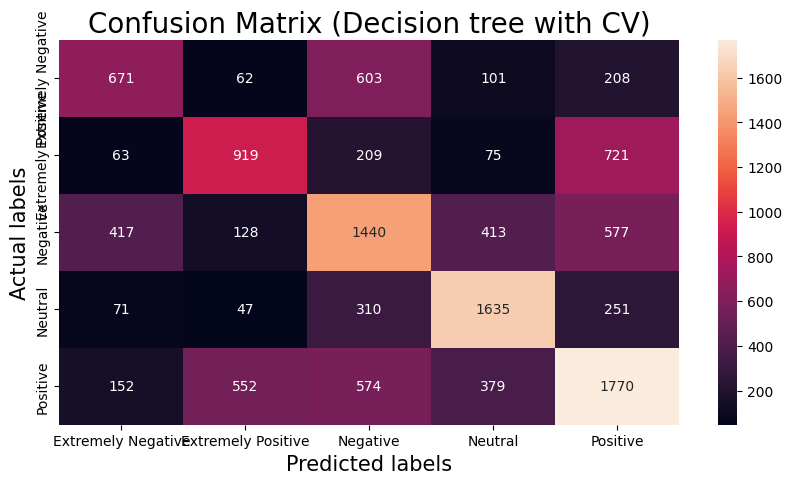

In [61]:
# Define the labels for the confusion matrix classes
labels = np.unique(np.concatenate((y_test, pred_lr_cv)))

#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in decision tree classifier model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This model gives an accuracy score of 50% which implies that our model is performing well.

### ML Model - 3 SVM with CV

In [63]:
# ML Model - 3 Implementation
from sklearn.svm import SVC
# Initializing model
svm_cv = SVC()
# Fit the Algorithm
#fitting the data to model
svm_cv.fit(cv_X_train,y_train)
# Predict on the model
#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [64]:
pred_svm_cv

array(['Extremely Negative', 'Negative', 'Neutral', ..., 'Negative',
       'Positive', 'Positive'], dtype=object)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.5775024295432458


In [66]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

                    precision    recall  f1-score   support

Extremely Negative       0.73      0.42      0.53      1645
Extremely Positive       0.77      0.49      0.60      1987
          Negative       0.52      0.54      0.53      2975
           Neutral       0.60      0.71      0.65      2314
          Positive       0.52      0.65      0.58      3427

          accuracy                           0.58     12348
         macro avg       0.62      0.56      0.58     12348
      weighted avg       0.60      0.58      0.58     12348



[Text(0, 0.5, 'Extremely Negative'),
 Text(0, 1.5, 'Extremely Positive'),
 Text(0, 2.5, 'Negative'),
 Text(0, 3.5, 'Neutral'),
 Text(0, 4.5, 'Positive')]

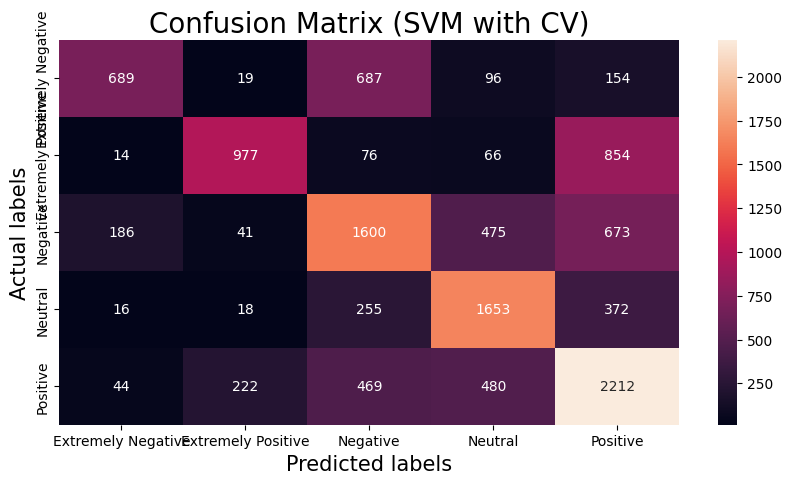

In [67]:
# Define the labels for the confusion matrix classes
labels = np.unique(np.concatenate((y_test, pred_lr_cv)))

#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in SVM model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This model gives an accuracy score of 57% which implies that our model is performing well.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Certainly! Let's discuss the evaluation metric, "Accuracy," and its indication towards the business. We'll also explore the business impact of using ML models based on this metric.

Accuracy: Accuracy is a commonly used evaluation metric that measures the proportion of correctly classified instances over the total number of instances. It provides an overall measure of the model's correctness in predicting the outcome.

**Indication Towards Business:**

Accuracy indicates how well the ML model can correctly classify instances within a dataset. In the context of sentiment analysis for coronavirus tweets, accuracy represents the percentage of correctly predicted sentiment labels.

A higher accuracy score suggests that the ML model is making a higher proportion of correct predictions, indicating a higher level of correctness in sentiment classification.

Businesses can use accuracy to gauge the reliability of sentiment predictions, allowing them to make informed decisions based on accurate sentiment analysis of tweets related to the coronavirus.

**Business Impact of the ML Model:**

By using ML models for sentiment analysis on coronavirus tweets, businesses can gain insights into public sentiment. Accurate sentiment analysis enables businesses to understand whether tweets express positive, negative, or neutral sentiments regarding the pandemic.

The ML model's accuracy helps businesses identify trends, gauge public opinion, and measure the impact of their actions or events related to the coronavirus.

Accurate sentiment analysis aids businesses in adjusting their marketing strategies, communication plans, and customer engagement approaches according to public sentiment. This can lead to enhanced brand perception and customer satisfaction.

With accurate sentiment analysis, companies can proactively address concerns, detect early warning signs, and take necessary actions to manage potential risks or crises related to the coronavirus.

Accurate sentiment analysis can facilitate improved decision-making at different levels of an organization, influencing strategic planning, crisis management, and public relations activities.

Additionally, sentiment analysis accuracy can contribute to refining customer targeting, providing personalized customer experiences, and tailoring products or services to meet customer needs effectively.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy, precision, and recall are classification metrics that are widely considered to evaluate the performance of machine learning models. These metrics provide important insights into the model's predictive abilities and can have a direct positive impact on business outcomes. Here's how they can be useful:

**Accuracy:** Accuracy measures the overall correctness of the model's predictions by comparing the number of correct predictions with the total number of predictions made.

**Positive impact on businesses:** Accuracy is a commonly used metric to assess model performance and is easily understood by stakeholders. A high accuracy indicates that the model is making correct predictions, improving decision-making and reducing errors. In a business context, accurate predictions can lead to improved customer satisfaction, optimized resource allocation, increased operational efficiency, and better decision-making, ultimately leading to business growth.

**Precision:** Precision measures the proportion of correctly predicted positive instances (true positives) out of the total instances predicted as positive.

**Positive impact on businesses:** Precision is particularly useful in situations where a false positive prediction can be costly, such as fraud detection or medical diagnosis. A high precision indicates that the model is accurately predicting positive instances, reducing false positives and minimizing the risk of incorrect actions or decisions based on erroneous predictions. This can help businesses save costs, improve customer trust, and prevent potential reputational damage.

**Recall:** Recall, also known as sensitivity or true positive rate, calculates the proportion of correctly predicted positive instances (true positives) out of the total actual positive instances.

**Positive impact on businesses:** Recall is important in scenarios where it is crucial to capture all positive instances, even at the cost of some false positives. For example, in the context of spam email classification, it is important to minimize false negatives (classifying a spam email as legitimate) to prevent important emails from being missed. High recall is beneficial for businesses in situations where the cost of missing positive instances is high. It helps in improving customer satisfaction, providing timely notifications, detecting anomalies, or identifying potential opportunities.

Overall, accuracy, precision, and recall metrics play a vital role in evaluating model performance and can directly impact business outcomes. Accurate predictions, high precision, and high recall contribute to improved decision-making, optimized resource allocation, enhanced customer satisfaction, minimized risks, and cost savings. Therefore, businesses should consider these metrics while building and evaluating their machine learning models to ensure positive impacts on their operations and growth.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choosed logistic regression, support vector machine and decision tree classifier as my final prediction. Here is the summary below.

The selection of Logistic Regression, Support Vector Machine (SVM), and Decision Tree Classifier as the final prediction models can be based on their individual strengths and suitability for different types of data and problem domains. Here's an explanation for why these models were chosen:

**Logistic Regression:**
        
**Strengths:** Logistic regression is a versatile and widely used classification algorithm. It provides probabilistic predictions and is well-suited for binary or multi-class classification tasks. It handles both linear and non-linear relationships between features by applying a logit function. Logistic regression models can be interpreted easily, and feature importance can be inferred from the coefficients.
        
**Application:** Logistic regression is often applied when the relationship between independent variables and the probability of a certain outcome needs to be understood. It is commonly used in healthcare, finance, marketing, and social sciences for predicting outcomes such as disease diagnosis, customer churn, or credit risk assessment. Its interpretability and simplicity make it a popular choice when feature relations need to be understood.

**Support Vector Machine (SVM):**
        
**Strengths:** SVM is a powerful algorithm for binary classification that maximizes the margin between data points of different classes. It can handle linearly separable as well as non-linearly separable data by leveraging kernel functions like radial basis function (RBF). SVMs are less prone to overfitting and perform well on high-dimensional data.
        
**Application:** SVMs are commonly used in various domains, such as image recognition, text classification, and bioinformatics. They excel in scenarios where there is a need to find appropriate decision boundaries that separate classes effectively. SVMs can handle both linear and non-linear relationships in the data and are particularly useful when feature space is complex or when interpretability is not the primary concern.

**Strength of Decision Tree Classifier:**

**Interpretability:** Decision trees are highly interpretable and provide clear explanations for the decision-making process. The tree structure allows for easy visualization and understanding of how the model arrives at its predictions. This interpretability is valuable in various domains, including finance, healthcare, and fraud detection, where explainability is crucial.

**Handling Non-linearity:** Decision trees can capture complex relationships between features and the target variable without assuming linearity. They are effective at handling non-linear relationships, making them suitable for problems where interactions among features play a significant role in the outcome.

**Handling Mixed Data Types:** Decision trees can handle both numerical and categorical features, making them versatile for datasets with a mixture of data types. They automatically handle missing values and do not require extensive data preprocessing compared to some other algorithms.

**Feature Importance:** Decision trees provide information about the importance of features in the prediction process. This feature importance analysis can help in feature selection, identifying key factors influencing the outcome, and gaining valuable insights into the problem domain.

**Applications of Decision Tree Classifier:**

**Classification Problems:** Decision trees are widely used for classification tasks, where the goal is to predict categorical or discrete class labels. They are frequently applied in areas such as customer segmentation, disease diagnosis, sentiment analysis, and recommendation systems.

**Decision Support Systems:** Due to their interpretability, decision trees are commonly used in decision support systems. They provide insights and recommendations to aid in decision-making processes, such as determining loan approvals, credit risk assessment, and determining optimal marketing strategies.

**Pattern Recognition:** Decision trees can effectively recognize patterns in data, making them suitable for tasks like image and object recognition, speech analysis, and natural language processing. Their ability to handle both numerical and categorical features makes them adaptable to diverse data types in such applications.

**Preprocessing Step for Ensemble Models:** Decision trees are often used as a preprocessing step in ensemble models like random forests or gradient boosting, where multiple trees are combined to improve prediction accuracy and reduce overfitting. Decision trees act as individual learners in these ensemble methods, contributing to the final prediction.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explainability tools can help analyze the inner workings and feature importance of Logistic Regression, Support Vector Machine (SVM), and Decision Tree Classifier models. While there are various options available, let's discuss some general concepts and approaches used for feature importance analysis:

**Logistic Regression:** Logistic regression is a linear model that calculates the probability of a binary or multi-class outcome. Feature importance in logistic regression can be determined by analyzing the coefficients of the model.

**Coefficient interpretation:** The coefficients in logistic regression represent the relationship between each feature and the log-odds of the target variable. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship. The magnitude of the coefficient reflects the importance of the corresponding feature. Features with larger coefficient values have a stronger impact on the outcome.

**Support Vector Machine (SVM):** SVMs find an optimal hyperplane that separates classes in a high-dimensional feature space. Kernel SVMs can handle non-linear relationships. Feature importance analysis in SVMs is usually based on the proximity of support vectors to the decision boundary.

**Support vectors:** Support vectors are the data points closest to the decision boundary. Analyzing the support vectors can provide insights into the features that are most influential in determining the decision boundary. Features corresponding to support vectors with high weights contribute more to the decision-making process.

**Kernel interpretation:** In kernel SVMs, the choice of the kernel function affects feature importance. By examining the transformation performed by the kernel, we can understand the feature space in which the SVM operates and gain insights into the important features in that space.

The Decision Tree Classifier is a popular machine learning algorithm used for both classification and regression tasks. It builds a tree-like model by partitioning the training data into subsets based on features and target labels. The algorithm uses a divide-and-conquer approach recursively to maximize the information gain or minimize impurity at each splitting point.

In a Decision Tree Classifier, each internal node represents a feature or attribute, while each leaf node represents a class label or prediction. The topmost node is called the root node, and the branches represent the decision rules that lead from the root to the leaf nodes. The classifier works by traversing the tree from the root to a leaf node based on the features of the instance being classified, and the leaf node reached determines the class label prediction.

Feature importance refers to the measurement of the predictive power or impact of each feature in the Decision Tree Classifier. This information is valuable for understanding which features contribute the most to the model's predictions. Several model explainability tools can help in determining feature importance, such as:

**Feature Importance with Gini Index**: The Gini Index measures the impurity or disorder of a set of samples in a node. The relative importance of each feature can be calculated using the total impurity reduction achieved by that feature across all nodes in the tree.

**Permutation Importance:** This approach involves randomly permuting the values of a single feature and observing the impact on the model's performance. The decrease in model performance indicates the importance of that feature. By comparing the performance with shuffled features to the original performance, the tool determines the relative importance.

**Tree Interpreter:** A tree interpreter tool provides feature importance by computing the contribution of each feature at each tree node. This detailed analysis attributes a portion of the prediction or decision at each node to specific features, providing insights into their relative importance.

**SHAP Values:** SHAP (SHapley Additive exPlanations) is a unified measure of feature importance based on cooperative game theory. It assigns an importance value to each feature by assessing the contribution of that feature across all possible combinations of features.

These model explainability tools enable us to understand the impact and relative importance of features in the Decision Tree Classifier. They provide valuable insights into which features are more influential in determining the model's predictions, helping to interpret the model's decision-making process and potentially guide feature selection or engineering efforts.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, sentiment analysis of coronavirus tweets can provide valuable insights to businesses during the ongoing pandemic. By analyzing the sentiment expressed in these tweets, businesses can better understand public opinion, sentiment trends, and the impact of their actions or events related to COVID-19. Here are some key takeaways:

**Understanding Public Sentiment:** Sentiment analysis helps to gauge whether tweets express positive, negative, or neutral sentiments regarding the coronavirus. This understanding enables businesses to monitor public sentiment and adapt their strategies accordingly.

**Enhanced Brand Perception:** Accurate sentiment analysis allows businesses to align their messaging and communication plans with the prevailing sentiment. By responding to negative sentiment or leveraging positive sentiment, businesses can improve their brand perception and customer satisfaction.

**Proactive Crisis Management:** Sentiment analysis helps businesses detect early warning signs and manage potential risks or crises related to the coronavirus. Identifying negative sentiment early on enables businesses to take appropriate actions to mitigate the impact and maintain their reputation.

**Targeted Marketing and Personalization:** Analyzing sentiment can support targeted marketing efforts by tailoring messages and campaigns to specific sentiment groups. Additionally, sentiment analysis can help in providing personalized customer experiences by understanding individual sentiment and preferences.

**Data-driven Decision-Making:** Sentiment analysis provides businesses with insights needed for data-driven decision-making. By analyzing sentiment patterns, businesses can make informed decisions related to marketing strategies, customer engagement, crisis management, and product development.

**Monitoring and Responding to Customer Needs:** Sentiment analysis helps in understanding customer pain points, preferences, and concerns related to the pandemic. By monitoring sentiment, businesses can promptly respond to customer needs, address concerns, and provide appropriate solutions.

It's worth noting that accurate sentiment analysis requires robust ML models, well-labeled datasets, and continuous monitoring to ensure the models perform effectively. Evaluating sentiment analysis metrics, such as accuracy, precision, and recall, helps businesses assess the reliability and performance of their models and make necessary improvements.

Overall, sentiment analysis of coronavirus tweets has significant business implications, enabling organizations to stay informed, make data-driven decisions, and engage with customers effectively during these challenging times.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***